<a href="https://colab.research.google.com/github/Nyakiamo-Samuel/CAR-WASH/blob/main/Car_Wash_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_theme(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
car_wash=pd.ExcelFile('CAR WASH RECORDS REVISED.xlsx')

In [ ]:
for sheet_name in car_wash.sheet_names:
    data=pd.read_excel(car_wash, sheet_name)
    data.to_csv(f'{sheet_name}.csv', index=False)

In [ ]:
data

,DATE,CAR IDENTIFICATION,Unnamed: 2,AMOUNT,CODE,STATUS,BALANCE,RESPONSIBILITY
0,2024-01-11 00:00:00,KDB 647W PRADO,NORMAL WASH,300.0,MPESA,PAID,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-02-11 00:00:00,KCR 330Z COLT SK21D4ZU6X,NORMAL WASH,300.0,MPESA,PAID,NaN,MUTUA
3,NaN,KCR 006K PRADO,NORMAL WASH,300.0,NaN,UNPAID,NaN,STEVE
4,NaN,KDR 709N SIENTA,NORMAL WASH,300.0,MPESA,PAID,NaN,STEVE
...,...,...,...,...,...,...,...,...
125,NaN,KCG 369B HARRIER,NORMAL WASH,300.0,NaN,NaN,NaN,NaN
126,NaN,KDP 115T LANDCRUISER,WASH & VACUUM,600.0,NaN,NaN,NaN,NaN
127,NaN,KBP 134L HONDA,NORMAL WASH,300.0,NaN,NaN,NaN,NaN
128,NaN,KBW 667G MARK X,NORMAL WASH,300.0,NaN,NaN,NaN,NaN


In [ ]:
aug=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Excel/August1.csv')
aug

,DATE,CAR IDENTIFICATION,SERVICE,AMOUNT,CODE,NOT PAID,BALANCE,ADDITIONAL SERVICE,RESPONSIBILITY,Unnamed: 9
0,09/08/2024,KCY 688Y COLT,WASH AND VACUUM,600,MPESA,PAID,NaN,NaN,NaN,NaN
1,09/08/2024,KAY 419 FORRESTER,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
2,09/08/2024,KCH 178G LEXUS,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
3,09/08/2024,KDL 274X ISUZU,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
4,09/08/2024,KBA 128G BENZ,WASH AND VACUUM,400,CASH,PAID,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
119,31/08/2031,KDB 647W PRADO,NORMAL WASH,400,MPESA,PAID,NaN,NaN,NaN,NaN
120,31/08/2032,KCW 996F HONDA,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
121,31/08/2033,KCD 088P HARRIER,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
122,31/08/2034,KDQ 604R DEMIO,NORMAL WASH,500,MPESA,PAID,NaN,NaN,NaN,NaN


In [ ]:
aug.shape

(124, 10)

In [ ]:
aug.columns

Index(['DATE', 'CAR IDENTIFICATION', 'SERVICE', 'AMOUNT', 'CODE', 'NOT PAID',
       'BALANCE', 'ADDITIONAL SERVICE', 'RESPONSIBILITY', 'Unnamed: 9'],
      dtype='object')

In [ ]:
aug.rename(columns={'NOT PAID':'STATUS'}, inplace=True)

In [ ]:
aug.drop('Unnamed: 9', axis=1, inplace=True)

In [ ]:
aug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   DATE                124 non-null    object
 1   CAR IDENTIFICATION  124 non-null    object
 2   SERVICE             122 non-null    object
 3   AMOUNT              121 non-null    object
 4   CODE                113 non-null    object
 5   STATUS              123 non-null    object
 6   BALANCE             6 non-null      object
 7   ADDITIONAL SERVICE  8 non-null      object
 8   RESPONSIBILITY      17 non-null     object
dtypes: object(9)
memory usage: 8.8+ KB


In [ ]:
sept=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Excel/September1.csv')
sept

,DATE,CAR IDENTIFICATION,SERVICE,AMOUNT,CODE,STATUS,BALANCE,ADDITIONAL SERVICE,RESPONSIBILITY,NORMAL,Unnamed: 10,Unnamed: 11
0,02/09/2024,KCH 344D MERCEDES,WASH AND VACUUM,600,MPESA,PAID,NaN,NaN,NaN,NaN,NaN,NaN
1,02/09/2024,GKA 955R MERCEDES,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN,NaN,NaN
2,02/09/2024,KCV 989S MERCEDES,NORMAL WASH,300,MPESA,PAID,NaN,NaN,SERVICE INCLUSIVE,NaN,NaN,NaN
3,02/09/2024,KCY 688F COLT,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN,NaN,NaN
4,02/09/2024,KCR 330Z COLT,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
181,30/09/2024,KDP 911E BENZ,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN,NaN,NaN
182,30/09/2024,KBZ 052W NISSAN PATROL,NORMAL WASH,4000,MPESA,PAID,NaN,NaN,NaN,NaN,NaN,NaN
183,30/09/2024,KDE 980V GOLF,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN,NaN,NaN
184,30/09/2024,KUU 111 R.R,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sept.shape

(186, 12)

In [ ]:
sept.columns

Index(['DATE', 'CAR IDENTIFICATION', 'SERVICE', 'AMOUNT', 'CODE', 'STATUS',
       'BALANCE', 'ADDITIONAL SERVICE', 'RESPONSIBILITY', 'NORMAL',
       'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')

In [ ]:
sept.drop(['Unnamed: 10', 'Unnamed: 11'], axis=1, inplace=True)

In [ ]:
sept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   DATE                186 non-null    object
 1   CAR IDENTIFICATION  186 non-null    object
 2   SERVICE             185 non-null    object
 3   AMOUNT              161 non-null    object
 4   CODE                138 non-null    object
 5   STATUS              182 non-null    object
 6   BALANCE             26 non-null     object
 7   ADDITIONAL SERVICE  3 non-null      object
 8   RESPONSIBILITY      47 non-null     object
 9   NORMAL              10 non-null     object
dtypes: object(10)
memory usage: 14.7+ KB


In [ ]:
oct=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/Excel/October1.csv")
oct

,DATE,CAR IDENTIFICATION,SERVICE,AMOUNT,CODE,STATUS,BALANCE,ADDITIONAL SERVICE,RESPONSIBILITY,Normal
0,10/01/2024,KDP 330S MERCEDES,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
1,10/01/2024,KAX 577J COROLLA,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
2,10/01/2024,KCR 330Z COLTT,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
3,10/01/2024,CARPET,NORMAL WASH,"2,700.00",CASH,PAID,NaN,NaN,NaN,ANTHONY RECEIVED CASH
4,10/01/2024,KDP 911E MERCEDES,NORMAL WASH,300,MPESA,PAID,NaN,NaN,SERVICE INCLUSIVE,NaN
...,...,...,...,...,...,...,...,...,...,...
190,10/31/2024,KBS 154M TOYOTA,NORMAL WASH,300,NaN,PAID,NaN,NaN,STEVE,NaN
191,10/31/2024,KDP 574D FORRESTER,NORMAL WASH,300,MPESA,PAID,NaN,NaN,STEVE,NaN
192,10/31/2024,KBS 149M IST,NORMAL WASH,300,NaN,PAID,NaN,NaN,STEVE,NaN
193,10/31/2024,KAU 240J IMPREZZA(GS8),ENGINE WATER WASH,300,NaN,UNPAID,NaN,NaN,MUTUA,NaN


In [ ]:
oct.shape

(195, 10)

In [ ]:
oct.columns

Index(['DATE', 'CAR IDENTIFICATION', 'SERVICE', 'AMOUNT', 'CODE', 'STATUS',
       'BALANCE', 'ADDITIONAL SERVICE', 'RESPONSIBILITY', 'Normal'],
      dtype='object')

In [ ]:
oct.rename(columns={'Normal':'NORMAL'}, inplace=True)

In [ ]:
oct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   DATE                195 non-null    object
 1   CAR IDENTIFICATION  195 non-null    object
 2   SERVICE             194 non-null    object
 3   AMOUNT              155 non-null    object
 4   CODE                146 non-null    object
 5   STATUS              195 non-null    object
 6   BALANCE             42 non-null     object
 7   ADDITIONAL SERVICE  9 non-null      object
 8   RESPONSIBILITY      111 non-null    object
 9   NORMAL              9 non-null      object
dtypes: object(10)
memory usage: 15.4+ KB


In [ ]:
nov=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/Excel/November1.csv")
nov

,DATE,CAR IDENTIFICATION,Unnamed: 2,AMOUNT,CODE,STATUS,BALANCE,RESPONSIBILITY,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,01/11/2024,KDB 647W PRADO,NORMAL WASH,300.00,MPESA,PAID,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02/11/2024,KCR 330Z COLT SK21D4ZU6X,NORMAL WASH,300.00,MPESA,PAID,NaN,MUTUA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02/11/2024,KCR 006K PRADO,NORMAL WASH,300.00,NaN,UNPAID,NaN,STEVE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,02/11/2024,KDR 709N SIENTA,NORMAL WASH,300.00,MPESA,PAID,NaN,STEVE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,02/11/2024,KDP 572M LANDCRUISER,NORMAL WASH,300.00,NaN,UNPAID,NaN,STEVE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
nov.shape

(980, 24)

In [ ]:
nov.columns

Index(['DATE', 'CAR IDENTIFICATION', 'Unnamed: 2', 'AMOUNT', 'CODE', 'STATUS',
       'BALANCE', 'RESPONSIBILITY', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [ ]:
nov.rename(columns={'Unnamed: 2':'SERVICE'}, inplace=True)

In [ ]:
nov.drop(['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23'], axis=1, inplace=True)


In [ ]:
nov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   DATE                111 non-null    object
 1   CAR IDENTIFICATION  111 non-null    object
 2   SERVICE             111 non-null    object
 3   AMOUNT              111 non-null    object
 4   CODE                78 non-null     object
 5   STATUS              100 non-null    object
 6   BALANCE             6 non-null      object
 7   RESPONSIBILITY      101 non-null    object
dtypes: object(8)
memory usage: 61.4+ KB


In [ ]:
nov.drop(nov.index[111:], inplace=True)

In [ ]:
nov

,DATE,CAR IDENTIFICATION,SERVICE,AMOUNT,CODE,STATUS,BALANCE,RESPONSIBILITY
0,01/11/2024,KDB 647W PRADO,NORMAL WASH,300.00,MPESA,PAID,NaN,NaN
1,02/11/2024,KCR 330Z COLT SK21D4ZU6X,NORMAL WASH,300.00,MPESA,PAID,NaN,MUTUA
2,02/11/2024,KCR 006K PRADO,NORMAL WASH,300.00,NaN,UNPAID,NaN,STEVE
3,02/11/2024,KDR 709N SIENTA,NORMAL WASH,300.00,MPESA,PAID,NaN,STEVE
4,02/11/2024,KDP 572M LANDCRUISER,NORMAL WASH,300.00,NaN,UNPAID,NaN,STEVE
...,...,...,...,...,...,...,...,...
106,23/11/2024,KCG 369B HARRIER,NORMAL WASH,300,NaN,NaN,NaN,NaN
107,23/11/2024,KDP 115T LANDCRUISER,WASH & VACUUM,600,NaN,NaN,NaN,NaN
108,23/11/2024,KBP 134L HONDA,NORMAL WASH,300,NaN,NaN,NaN,NaN
109,23/11/2024,KBW 667G MARK X,NORMAL WASH,300,NaN,NaN,NaN,NaN


In [ ]:
nov.shape

(111, 8)

In [ ]:
dec=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/Excel/December.csv")
dec

,DATE,CAR IDENTIFICATION,TYPE OF SERVICE,AMOUNT,CODE,STATUS,BALANCE,RESPONSIBILITY,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1.12.2024,KCN 037X Landcruiser,NORMAL WASH,300.0,SL11SC2G7B,PAID,NaN,FELIX,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.12.2024,KDN 055C Subaru,NORMAL WASH,300.0,SL19TMSPO1,PAID,NaN,FELIX,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.12.2024,KCS 807V Audi Q7,NORMAL WASH,300.0,SL26YB4FFM,PAID,NaN,MUTUA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.12.2024,KDH 278H Landcruiser,NORMAL WASH,300.0,SL23XMNRVH,PAID,NaN,MUTUA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.12.2024,KDB 286J Landcruiser,NORMAL WASH,300.0,SL29X7OTCJ,PAID,NaN,MUTUA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dec.columns

Index(['DATE', 'CAR IDENTIFICATION', 'TYPE OF SERVICE', 'AMOUNT', 'CODE',
       'STATUS', 'BALANCE', 'RESPONSIBILITY', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26'],
      dtype='object')

In [ ]:
dec.drop(['Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26'], axis=1, inplace=True)
dec

,DATE,CAR IDENTIFICATION,TYPE OF SERVICE,AMOUNT,CODE,STATUS,BALANCE,RESPONSIBILITY
0,1.12.2024,KCN 037X Landcruiser,NORMAL WASH,300.0,SL11SC2G7B,PAID,NaN,FELIX
1,1.12.2024,KDN 055C Subaru,NORMAL WASH,300.0,SL19TMSPO1,PAID,NaN,FELIX
2,2.12.2024,KCS 807V Audi Q7,NORMAL WASH,300.0,SL26YB4FFM,PAID,NaN,MUTUA
3,2.12.2024,KDH 278H Landcruiser,NORMAL WASH,300.0,SL23XMNRVH,PAID,NaN,MUTUA
4,2.12.2024,KDB 286J Landcruiser,NORMAL WASH,300.0,SL29X7OTCJ,PAID,NaN,MUTUA
...,...,...,...,...,...,...,...,...
139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATE                125 non-null    object 
 1   CAR IDENTIFICATION  125 non-null    object 
 2   TYPE OF SERVICE     124 non-null    object 
 3   AMOUNT              124 non-null    float64
 4   CODE                119 non-null    object 
 5   STATUS              120 non-null    object 
 6   BALANCE             0 non-null      float64
 7   RESPONSIBILITY      90 non-null     object 
dtypes: float64(2), object(6)
memory usage: 9.1+ KB


In [ ]:
dec.rename(columns={'TYPE OF SERVICE':'SERVICE'}, inplace=True)

In [ ]:
dec.drop(dec.index[125:], inplace=True)

In [ ]:
dec

,DATE,CAR IDENTIFICATION,SERVICE,AMOUNT,CODE,STATUS,BALANCE,RESPONSIBILITY
0,1.12.2024,KCN 037X Landcruiser,NORMAL WASH,300.0,SL11SC2G7B,PAID,NaN,FELIX
1,1.12.2024,KDN 055C Subaru,NORMAL WASH,300.0,SL19TMSPO1,PAID,NaN,FELIX
2,2.12.2024,KCS 807V Audi Q7,NORMAL WASH,300.0,SL26YB4FFM,PAID,NaN,MUTUA
3,2.12.2024,KDH 278H Landcruiser,NORMAL WASH,300.0,SL23XMNRVH,PAID,NaN,MUTUA
4,2.12.2024,KDB 286J Landcruiser,NORMAL WASH,300.0,SL29X7OTCJ,PAID,NaN,MUTUA
...,...,...,...,...,...,...,...,...
120,20.12.2024,KCL 680Y Forester,NORMAL WASH,300.0,SLK86RV7Y8,PAID,NaN,NaN
121,20.12.2024,KCD 385F Nissan Navada,NORMAL WASH,300.0,SLK874K4TO,PAID,NaN,NaN
122,20.12.2024,KBA 128C Mercedes,NORMAL WASH,300.0,NaN,NaN,NaN,NaN
123,20.12.2024,KDN 093D Isuzu,NORMAL WASH,300.0,NaN,NaN,NaN,NaN


In [47]:
car_wash=pd.concat((aug,sept, oct, nov, dec), ignore_index=True )
car_wash

,DATE,CAR IDENTIFICATION,SERVICE,AMOUNT,CODE,STATUS,BALANCE,ADDITIONAL SERVICE,RESPONSIBILITY,NORMAL
0,09/08/2024,KCY 688Y COLT,WASH AND VACUUM,600,MPESA,PAID,NaN,NaN,NaN,NaN
1,09/08/2024,KAY 419 FORRESTER,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
2,09/08/2024,KCH 178G LEXUS,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
3,09/08/2024,KDL 274X ISUZU,NORMAL WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
4,09/08/2024,KBA 128G BENZ,WASH AND VACUUM,400,CASH,PAID,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
736,20.12.2024,KCL 680Y Forester,NORMAL WASH,300.0,SLK86RV7Y8,PAID,NaN,NaN,NaN,NaN
737,20.12.2024,KCD 385F Nissan Navada,NORMAL WASH,300.0,SLK874K4TO,PAID,NaN,NaN,NaN,NaN
738,20.12.2024,KBA 128C Mercedes,NORMAL WASH,300.0,NaN,NaN,NaN,NaN,NaN,NaN
739,20.12.2024,KDN 093D Isuzu,NORMAL WASH,300.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
car_wash.shape

(741, 11)

In [135]:
car_wash.reset_index(inplace=True)
car_wash.head()

,index,DATE,CAR IDENTIFICATION,SERVICE,AMOUNT,CODE,STATUS,BALANCE,ADDITIONAL SERVICE,RESPONSIBILITY,NORMAL
0,0,09/08/2024,KCY_688Y_COLT,WASH_AND_VACUUM,600,MPESA,PAID,NaN,NaN,NaN,NaN
1,1,09/08/2024,KAY_419_FORRESTER,NORMAL_WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
2,2,09/08/2024,KCH_178G_LEXUS,NORMAL_WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
3,3,09/08/2024,KDL_274X_ISUZU,NORMAL_WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
4,4,09/08/2024,KBA_128G_BENZ,WASH_AND_VACUUM,400,CASH,PAID,NaN,NaN,NaN,NaN


In [136]:
car_wash.columns

Index(['index', 'DATE', 'CAR IDENTIFICATION', 'SERVICE', 'AMOUNT', 'CODE',
       'STATUS', 'BALANCE', 'ADDITIONAL SERVICE', 'RESPONSIBILITY', 'NORMAL'],
      dtype='object')

In [ ]:
car_wash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               741 non-null    int64 
 1   DATE                741 non-null    object
 2   CAR IDENTIFICATION  741 non-null    object
 3   SERVICE             736 non-null    object
 4   AMOUNT              672 non-null    object
 5   CODE                594 non-null    object
 6   STATUS              720 non-null    object
 7   BALANCE             80 non-null     object
 8   ADDITIONAL SERVICE  20 non-null     object
 9   RESPONSIBILITY      366 non-null    object
 10  NORMAL              19 non-null     object
dtypes: int64(1), object(10)
memory usage: 63.8+ KB


In [ ]:
car_wash.duplicated().sum()

0

In [137]:
car_wash["DATE"].unique()

array(['09/08/2024', '10/08/2024', '11/08/2024', '12/08/2024',
       '13/08/2024', '13/08/2025', '13/08/2026', '13/08/2027',
       '13/08/2028', '13/08/2029', '13/08/2030', '13/08/2031',
       '14/08/2024', '14/08/2025', '15/08/2024', '15/08/2025',
       '15/08/2026', '15/08/2027', '15/08/2028', '16/08/2024',
       '16/08/2025', '16/08/2026', '16/08/2027', '16/08/2028',
       '16/08/2029', '16/08/2030', '17/08/2024', '17/08/2025',
       '17/08/2026', '17/08/2027', '17/08/2028', '17/08/2029',
       '19/08/2024', '19/08/2025', '20/08/2024', '20/08/2025',
       '20/08/2026', '20/08/2027', '20/08/2028', '21/08/2024',
       '21/08/2025', '21/08/2026', '21/08/2027', '21/08/2028',
       '22/08/2024', '22/08/2025', '22/08/2026', '22/08/2027',
       '22/08/2028', '23/08/2024', '23/08/2025', '23/08/2026',
       '24/08/2024', '24/08/2025', '24/08/2026', '24/08/2027',
       '24/08/2028', '24/08/2029', '24/08/2030', '24/08/2031',
       '25/08/2024', '25/08/2025', '26/08/2024', '26/08

In [138]:
car_wash["DATE"].replace('\.', '/', regex=True, inplace=True)
car_wash['DATE'].unique()

array(['09/08/2024', '10/08/2024', '11/08/2024', '12/08/2024',
       '13/08/2024', '13/08/2025', '13/08/2026', '13/08/2027',
       '13/08/2028', '13/08/2029', '13/08/2030', '13/08/2031',
       '14/08/2024', '14/08/2025', '15/08/2024', '15/08/2025',
       '15/08/2026', '15/08/2027', '15/08/2028', '16/08/2024',
       '16/08/2025', '16/08/2026', '16/08/2027', '16/08/2028',
       '16/08/2029', '16/08/2030', '17/08/2024', '17/08/2025',
       '17/08/2026', '17/08/2027', '17/08/2028', '17/08/2029',
       '19/08/2024', '19/08/2025', '20/08/2024', '20/08/2025',
       '20/08/2026', '20/08/2027', '20/08/2028', '21/08/2024',
       '21/08/2025', '21/08/2026', '21/08/2027', '21/08/2028',
       '22/08/2024', '22/08/2025', '22/08/2026', '22/08/2027',
       '22/08/2028', '23/08/2024', '23/08/2025', '23/08/2026',
       '24/08/2024', '24/08/2025', '24/08/2026', '24/08/2027',
       '24/08/2028', '24/08/2029', '24/08/2030', '24/08/2031',
       '25/08/2024', '25/08/2025', '26/08/2024', '26/08

In [139]:
#car_wash["DATE"]=car_wash["DATE"].strftime('%d%b%Y')
car_wash["DATE"] = pd.to_datetime(car_wash["DATE"], format='mixed', yearfirst=False)
print(car_wash["DATE"].dtype)

datetime64[ns]


In [140]:
car_wash.replace('-', '', regex=True, inplace=True)
car_wash.replace('', np.nan, regex=True, inplace=True)
car_wash.replace(',', '', regex=True, inplace=True)
car_wash.replace(' ', '_', regex=True, inplace=True)

In [141]:
car_wash

,index,DATE,CAR IDENTIFICATION,SERVICE,AMOUNT,CODE,STATUS,BALANCE,ADDITIONAL SERVICE,RESPONSIBILITY,NORMAL
0,0,2024-09-08,KCY_688Y_COLT,WASH_AND_VACUUM,600,MPESA,PAID,NaN,NaN,NaN,NaN
1,1,2024-09-08,KAY_419_FORRESTER,NORMAL_WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
2,2,2024-09-08,KCH_178G_LEXUS,NORMAL_WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
3,3,2024-09-08,KDL_274X_ISUZU,NORMAL_WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN
4,4,2024-09-08,KBA_128G_BENZ,WASH_AND_VACUUM,400,CASH,PAID,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
736,736,2024-12-20,KCL_680Y_Forester,NORMAL_WASH,300.0,SLK86RV7Y8,PAID,NaN,NaN,NaN,NaN
737,737,2024-12-20,KCD_385F_Nissan_Navada,NORMAL_WASH,300.0,SLK874K4TO,PAID,NaN,NaN,NaN,NaN
738,738,2024-12-20,KBA_128C_Mercedes,NORMAL_WASH,300.0,NaN,NaN,NaN,NaN,NaN,NaN
739,739,2024-12-20,KDN_093D_Isuzu,NORMAL_WASH,300.0,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
car_wash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               741 non-null    int64         
 1   DATE                741 non-null    datetime64[ns]
 2   CAR IDENTIFICATION  741 non-null    object        
 3   SERVICE             736 non-null    object        
 4   AMOUNT              672 non-null    object        
 5   CODE                561 non-null    object        
 6   STATUS              720 non-null    object        
 7   BALANCE             80 non-null     object        
 8   ADDITIONAL SERVICE  20 non-null     object        
 9   RESPONSIBILITY      366 non-null    object        
 10  NORMAL              19 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 63.8+ KB


In [143]:
new_reg=car_wash['CAR IDENTIFICATION'].str.extract('(\w+\d+\w)(\w+)', expand=True).rename(columns={0:'Reg', 1:'Model'})
new_reg

,Reg,Model
0,KCY_688Y,_COLT
1,KAY_419_,FORRESTER
2,KCH_178G,_LEXUS
3,KDL_274X,_ISUZU
4,KBA_128G,_BENZ
...,...,...
736,KCL_680Y,_Forester
737,KCD_385F,_Nissan_Navada
738,KBA_128C,_Mercedes
739,KDN_093D,_Isuzu


In [144]:
new_reg.replace("_", " ", regex=True, inplace=True)

In [145]:
new_reg.isnull().value_counts()

,,count
Reg,Model,
False,False,713
True,True,28


In [146]:
list_=['Reg', 'Model']
new_reg[list_]=new_reg[list_].astype(str)

In [147]:
print(new_reg.info())
new_reg

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Reg     741 non-null    object
 1   Model   741 non-null    object
dtypes: object(2)
memory usage: 11.7+ KB
None


,Reg,Model
0,KCY 688Y,COLT
1,KAY 419,FORRESTER
2,KCH 178G,LEXUS
3,KDL 274X,ISUZU
4,KBA 128G,BENZ
...,...,...
736,KCL 680Y,Forester
737,KCD 385F,Nissan Navada
738,KBA 128C,Mercedes
739,KDN 093D,Isuzu


In [148]:
car_wash_1=pd.concat((car_wash, new_reg), axis=1).drop("CAR IDENTIFICATION", axis=1)
car_wash_1.sample(10)

,index,DATE,SERVICE,AMOUNT,CODE,STATUS,BALANCE,ADDITIONAL SERVICE,RESPONSIBILITY,NORMAL,Reg,Model
655,655,2024-09-12,WASH_&_ENGINE,600.0,SLA7VYSWEB,PAID,NaN,NaN,MUTUA,NaN,KDR 997H,Premio
451,451,2024-10-24,WASH_AND_ENGINE,500,MPESA,PAID,NaN,NaN,BOOSTED,NaN,KBR 338E,SUBARU
474,474,2024-10-28,NORMAL_WASH,300,MPESA,PAID,NaN,NaN,STEVE,NaN,KCC 200G,PRADO
185,185,2024-09-09,NORMAL_WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN,GKA 955R,MERCEDES
380,380,2024-10-12,NORMAL_WASH,300,MPESA,PAID,NaN,NaN,NaN,NaN,KCU 570V,VANGUARD
599,599,2024-11-21,NORMAL_WASH,300,MPESA,PAID,NaN,NaN,MUTUA,NaN,KBP 296C,POLLO
627,627,2024-03-12,NORMAL_WASH,300.0,SL405945F2,PAID,NaN,NaN,MUTUA,NaN,KDN 384R,CX5
466,466,2024-10-26,NORMAL_WASH,NaN,NaN,UNPAID,300,NaN,MUTUA(SERVICE_INCLUSIVE),NaN,GKA 106T,MERCEDES
593,593,2024-11-20,NORMAL_WASH,300,MPESA,PAID,NaN,NaN,MUTUA,NaN,KCR 340X,COLT
550,550,2024-11-11,WASH_AND_VACUUM,600.00,MPESA,PAID,NaN,NaN,MUTUA,NaN,KCX 044X,SUBARU


In [149]:
car_wash_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               741 non-null    int64         
 1   DATE                741 non-null    datetime64[ns]
 2   SERVICE             736 non-null    object        
 3   AMOUNT              672 non-null    object        
 4   CODE                561 non-null    object        
 5   STATUS              720 non-null    object        
 6   BALANCE             80 non-null     object        
 7   ADDITIONAL SERVICE  20 non-null     object        
 8   RESPONSIBILITY      366 non-null    object        
 9   NORMAL              19 non-null     object        
 10  Reg                 741 non-null    object        
 11  Model               741 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 69.6+ KB


In [150]:
car_wash_1.isnull().value_counts()

index  DATE   SERVICE  AMOUNT  CODE   STATUS  BALANCE  ADDITIONAL SERVICE  RESPONSIBILITY  NORMAL  Reg    Model
False  False  False    False   False  False   True     True                True            True    False  False    321
                                                                           False           True    False  False    209
                               True   False   True     True                False           True    False  False     74
                       True    True   False   False    True                False           True    False  False     34
                       False   True   False   True     True                True            True    False  False     20
                       True    True   False   False    True                False           False   False  False     15
                       False   True   True    True     True                True            True    False  False     11
                               False  False   False    True                False           True    False  False      9
                                              True     False               True            True    False  False      6
                       True    True   False   False    False               False           True    False  False      6
                       False   False  False   False    True                True            True    False  False      4
              True     False   False  False   True     True                True            True    False  False      3
              False    True    True   True    False    True                False           True    False  False      3
                                      False   False    True                True            True    False  False      2
                               False  False   False    True                False           True    False  False      2
                       False   True   True    True     True                False           True    False  False      2
              True     True    True   True    True     True                True            True    False  False      2
              False    False   True   False   True     False               True            True    False  False      2
                                              False    True                False           True    False  False      2
                               False  False   True     True                True            False   False  False      2
                       True    True   False   True     False               False           True    False  False      2
                                                       True                False           True    False  False      1
                                              False    True                True            False   False  False      1
                       False   False  False   False    False               False           True    False  False      1
                       True    False  False   True     True                False           True    False  False      1
                       False   True   True    True     False               True            True    False  False      1
                                      False   True     False               False           True    False  False      1
                               False  True    True     True                False           True    False  False      1
                                      False   True     True                False           False   False  False      1
                                                       False               False           True    False  False      1
                               True   True    False    True                False           True    False  False      1
Name: count, dtype: int64

In [151]:
garage_col=list(car_wash_1.columns)
garage_col

['index',
 'DATE',
 'SERVICE',
 'AMOUNT',
 'CODE',
 'STATUS',
 'BALANCE',
 'ADDITIONAL SERVICE',
 'RESPONSIBILITY',
 'NORMAL',
 'Reg',
 'Model']

In [152]:
for i in garage_col:
    n_unique=car_wash_1[i].nunique()
    print('{0} has {1} unique entries. \n'.format(i,  n_unique))

index has 741 unique entries. 

DATE has 196 unique entries. 

SERVICE has 17 unique entries. 

AMOUNT has 34 unique entries. 

CODE has 74 unique entries. 

STATUS has 8 unique entries. 

BALANCE has 15 unique entries. 

ADDITIONAL SERVICE has 14 unique entries. 

RESPONSIBILITY has 27 unique entries. 

NORMAL has 6 unique entries. 

Reg has 421 unique entries. 

Model has 219 unique entries. 



In [153]:
car_wash_1["Model"][car_wash_1["Reg"]=="KCW 377M DEMIOSK48J"]="DEMIO"
car_wash_1["Model"][car_wash_1["Reg"]=="KDN 304C CX5"]="CX5"
car_wash_1["Reg"][car_wash_1["Reg"]=="KCR 330Z COLT"]="COLT"
car_wash_1["Reg"][car_wash_1["Reg"]=="KCW 377M DEMIOSK48J"]="KCW377M"
car_wash_1['Reg'][car_wash_1['Reg']=="KCW 377M DEMIOSK48J"]="KCW 377M"
car_wash_1["CODE"][car_wash_1["Reg"]=="KCW 377M DEMIOSK48J"]="SK48J"

In [56]:
#car_wash_1["Reg"].unique()

In [154]:
car_wash_1['STATUS'].unique()

array(['PAID', '_PAID', nan, 'NOT_PAID', 'UNPAID', 'SERVICE_INCLUSIVE',
       'OFFICE(UNPAID)', 'OFFICE_(UNPAID)', 'OFFICE'], dtype=object)

In [155]:
'''
PAID', '_PAID', nan, 'NOT_PAID', 'UNPAID', 'SERVICE_INCLUSIVE', 'OFFICE(UNPAID)', 'OFFICE_(UNPAID)', 'OFFICE'
'''
car_wash_1['STATUS'][car_wash_1['STATUS']=='NOT_PAID']='UNPAID'
car_wash_1["STATUS"][car_wash_1["STATUS"]=="_PAID"]='PAID'
car_wash_1['STATUS'][car_wash_1['STATUS']=='OFFICE(UNPAID)']='OFFICE'
car_wash_1['STATUS'][car_wash_1['STATUS']=='OFFICE_(UNPAID)']='OFFICE'
car_wash_1['STATUS'].fillna('UNPAID', inplace=True)

In [156]:
car_wash_1['STATUS'].unique()

array(['PAID', 'UNPAID', 'SERVICE_INCLUSIVE', 'OFFICE'], dtype=object)

In [157]:
car_wash_1['STATUS'].isnull().sum()

0

In [158]:
car_wash_1['SERVICE'].unique()

array(['WASH_AND_VACUUM', 'NORMAL_WASH', 'ENGINE_WATER_WASH',
       'WASH_AND_VACUUM_AND_ENGINE', 'WASH_AND_ENGINE', nan, 'RIM_POLISH',
       'CARPET_WASH', 'BODY_WASH', 'BODY_WASH_&_VACUUM', 'ENGINE_WASH',
       'BODYWASH_&_ENGINE', 'BODY_&_ENGINE_WASH', 'VACUUM_&_BODY_WASH',
       'WASH_&_VACUUM', 'WASH_VACUUM_&_ENGINE', 'WASH_&_ENGINE',
       'RIM_WASH'], dtype=object)

In [159]:
car_wash_1['SERVICE'].isnull().sum()

5

In [160]:
# Input lists
supposed_service = [
    'NORMAL_WASH', 'BODY_WASH', 'CARPET_WASH', 'WASH_AND_ENGINE',
    'WASH_AND_VACUUM_AND_ENGINE', 'WASH_AND_VACUUM', 'ENGINE_WATER_WASH',
    'ENGINE_STEAM_WASH', 'VACUUM', 'UNDER_WASH', 'RIM_POLISH', 'TIRE_POLISH',
    'SEAT_CLEANING_AND_NORMAL_WASH', 'CARPET_WASH', 'BODY_WASH', 'SERVICE_INCLUSIVE', 'SEAT_WASH', 'INTERIOR_WASH'
]

typed_service = ['WASH_AND_VACUUM', 'NORMAL_WASH', 'ENGINE_WATER_WASH', 'WASH_AND_VACUUM_AND_ENGINE', 'WASH_AND_ENGINE', None, 'RIM_POLISH',
                 'CARPET_WASH', 'BODY_WASH', 'BODY_WASH_&_VACUUM', 'ENGINE_WASH', 'BODYWASH_&_ENGINE', 'BODY_&_ENGINE_WASH',
                 'VACUUM_&_BODY_WASH', 'WASH_&_VACUUM', 'WASH_VACUUM_&_ENGINE', 'WASH_&_ENGINE', 'RIM_WASH']
# Clean and match
matched_services = [service for service in typed_service if service in supposed_service]

# Output the matched services
print("Matched Services: \n", matched_services)


Matched Services: 
 ['WASH_AND_VACUUM', 'NORMAL_WASH', 'ENGINE_WATER_WASH', 'WASH_AND_VACUUM_AND_ENGINE', 'WASH_AND_ENGINE', 'RIM_POLISH', 'CARPET_WASH', 'BODY_WASH']


In [161]:
car_wash_1['SERVICE'][car_wash_1['SERVICE']=='BODY_WASH_&_VACUUM']='WASH_AND_VACUUM'
car_wash_1['SERVICE'][car_wash_1['SERVICE']=='VACUUM_&_BODY_WASH',]='WASH_AND_VACUUM'
car_wash_1['SERVICE'][car_wash_1['SERVICE']=='WASH_VACUUM_&_ENGINE']='WASH_AND_VACUUM_AND_ENGINE'
car_wash_1['SERVICE'][car_wash_1['SERVICE']=='WASH_&_VACUUM']='WASH_AND_VACUUM'
car_wash_1['SERVICE'][car_wash_1['SERVICE']=='BODY_&_ENGINE_WASH']='WASH_AND_ENGINE'
car_wash_1['SERVICE'][car_wash_1['SERVICE']=='BODYWASH_&_ENGINE']='WASH_AND_ENGINE'
car_wash_1['SERVICE'][car_wash_1['SERVICE']=='ENGINE_WATER_WASH']='ENGINE_WASH'
car_wash_1['SERVICE'][car_wash_1['SERVICE']=='ENGINE_STEAM_WASH']='ENGINE_WASH'
car_wash_1['SERVICE'][car_wash_1['SERVICE']=='WASH_&_ENGINE']='WASH_AND_ENGINE'
#car_wash_1['SERVICE'].fillna('NONE', inplace=True)

In [162]:
car_wash_1['SERVICE'].isnull().sum()

5

In [163]:
car_wash_1['SERVICE'].unique()

array(['WASH_AND_VACUUM', 'NORMAL_WASH', 'ENGINE_WASH',
       'WASH_AND_VACUUM_AND_ENGINE', 'WASH_AND_ENGINE', nan, 'RIM_POLISH',
       'CARPET_WASH', 'BODY_WASH', 'RIM_WASH'], dtype=object)

In [164]:
car_wash_1['ADDITIONAL SERVICE'].unique()

array([nan, 'SERVICE_INCLUSIVE', 'SEATS_WASH_', 'OUTSIDE_ONLY', 'FOOD',
       'CARPET_WASHING', 'RIM_RESTORATION', 'INTERIOR_CLEANING',
       'COMPOUND_WASH', 'INTERIOR_WASH',
       'INTERIOR_WASH(REPEATE_WITH_DECREASER)',
       'INTERIOR_FITTINGS(ANTHONY)', 'HEADLIGHT_RESTORATION',
       'FOREIGN_AFFAIRS', 'WATER_MARK_REMOVAL(FOREIGN_AFFAIRS)'],
      dtype=object)

In [165]:
car_wash_1["ADDITIONAL SERVICE"][car_wash_1["ADDITIONAL SERVICE"]=="WATER_MARK_REMOVAL(FOREIGN_AFFAIRS)"]="FOREIGN_AFFAIRS"
car_wash_1["ADDITIONAL SERVICE"][car_wash_1["ADDITIONAL SERVICE"]=="INTERIOR_WASH(REPEATE_WITH_DECREASER)"]="INTERIOR_WASH"
car_wash_1["ADDITIONAL SERVICE"][car_wash_1["ADDITIONAL SERVICE"]=='SEATS_WASH_']='SEAT_WASH'
#car_wash_1["ADDITIONAL SERVICE"].fillna("NONE", inplace=True)

In [166]:
car_wash_1['ADDITIONAL SERVICE'].isnull().sum()

721

In [167]:
car_wash_1["ADDITIONAL SERVICE"].unique()

array([nan, 'SERVICE_INCLUSIVE', 'SEAT_WASH', 'OUTSIDE_ONLY', 'FOOD',
       'CARPET_WASHING', 'RIM_RESTORATION', 'INTERIOR_CLEANING',
       'COMPOUND_WASH', 'INTERIOR_WASH', 'INTERIOR_FITTINGS(ANTHONY)',
       'HEADLIGHT_RESTORATION', 'FOREIGN_AFFAIRS'], dtype=object)

In [168]:
car_wash_1["RESPONSIBILITY"].unique()

array([nan, 'STEVE', 'ANTHONY', 'SERVICE_INCLUSIVE', 'FREE_SERVICE',
       'EVA', 'GORDON', 'OWNER', 'BOOSTED', 'EVA_',
       'ASK_ANTHONY_FOR_PRICING', 'ANTHONY_', 'STEVE/MUTUA', 'MUTUA',
       'FOREIGN_AFFAIRS', 'GORDON(SHARON)', 'BOOSTED(MUTUA)',
       'MUTUA(SERVICE_INCLUSIVE)', 'MUTUA(neighbor)', 'MUTUA(CK)',
       'MUTUA(ANTHONY)', 'STEVE(SERVICE_INCLUSIVE)', 'MUTUA(BOOSTED)',
       'MUTUA_(CK)', 'ANTONY', 'FELIX', 'RAEL', 'OFFICE'], dtype=object)

In [169]:
car_wash_1['RESPONSIBILITY'][car_wash_1['RESPONSIBILITY']=='STEVE/MUTUA']='STEVE'
car_wash_1['RESPONSIBILITY'][car_wash_1['RESPONSIBILITY']=='ANTHONY_']='ANTHONY'
car_wash_1['RESPONSIBILITY'][car_wash_1['RESPONSIBILITY']=='ANTONY']='ANTHONY'
car_wash_1['RESPONSIBILITY'][car_wash_1['RESPONSIBILITY']=='ASK_ANTHONY_FOR_PRICING']='ANTHONY'
car_wash_1['RESPONSIBILITY'][car_wash_1['RESPONSIBILITY']=='EVA_']='EVA'
car_wash_1['RESPONSIBILITY'][car_wash_1['RESPONSIBILITY']=='STEVE(SERVICE_INCLUSIVE)']='SERVICE_INCLUSIVE'
car_wash_1['RESPONSIBILITY'][car_wash_1['RESPONSIBILITY']=='GORDON(SHARON)']='GORDON'
car_wash_1['RESPONSIBILITY'][car_wash_1['RESPONSIBILITY']=='MUTUA(SERVICE_INCLUSIVE)']='SERVICE_INCLUSIVE'
car_wash_1['RESPONSIBILITY'][car_wash_1['RESPONSIBILITY']=='MUTUA(neighbor)']='MUTUA'
car_wash_1['RESPONSIBILITY'][car_wash_1['RESPONSIBILITY']=='MUTUA(CK)']='MUTUA'
car_wash_1['RESPONSIBILITY'][car_wash_1['RESPONSIBILITY']=='MUTUA(ANTHONY)']='MUTUA'
car_wash_1['RESPONSIBILITY'][car_wash_1['RESPONSIBILITY']=='MUTUA_(CK)']='MUTUA'
car_wash_1['RESPONSIBILITY'][car_wash_1['RESPONSIBILITY']=='BOOSTED(MUTUA)']='BOOSTED'
car_wash_1['RESPONSIBILITY'][car_wash_1['RESPONSIBILITY']=='MUTUA(BOOSTED)']='BOOSTED'
car_wash_1['RESPONSIBILITY'].fillna('ANTHONY', inplace=True)
car_wash_1['RESPONSIBILITY'].unique()

array(['ANTHONY', 'STEVE', 'SERVICE_INCLUSIVE', 'FREE_SERVICE', 'EVA',
       'GORDON', 'OWNER', 'BOOSTED', 'MUTUA', 'FOREIGN_AFFAIRS', 'FELIX',
       'RAEL', 'OFFICE'], dtype=object)

In [170]:
car_wash_1['RESPONSIBILITY'].isnull().sum()

0

In [171]:
car_wash_1['CODE'].unique()

array(['MPESA', 'CASH', nan, 'SL11SC2G7B', 'SL19TMSPO1', 'SL26YB4FFM',
       'SL23XMNRVH', 'SL29X7OTCJ', 'SL27XN907Z', 'SL20Y1WW06',
       'SL405945F2', 'SL303CTYWK', 'SL313M1HSZ', 'SL56CGTLYO',
       'SL487KMH5W', 'SL599UBGLR', 'SL54AE3M9Q', 'SL52BJFESA',
       'SL50BS1C3U', 'SL58CAWGV2', 'SL68FUFKIU', 'SL79IVZL81',
       'SL79JX7029', 'SL79KIQ18L', 'SLC16HP0JT', 'SL73JA1931',
       'SL73KHVFMX', 'SL73KQI2L1', 'SL72LGYIEY', 'SL79LBO0P3',
       'SLA7VYSWEB', 'SL97TBXKY5', 'SL94U7ASYU', 'SL94TYW2WK',
       'SLB91L3QOJ', 'SLA9XRUFQN', 'SLA9XU3OWR', 'SLA0YHLZ26',
       'SLB61KK31Q', 'SLD4DG5V54', 'SLC567CVX1', 'SLB945BL3P',
       'SLB63MA0JC', 'SLC76J3QXF', 'SLC67DACRW', 'SLC28CCZZK',
       'SLC67ZUKL8', 'SLC48C6EYA', 'SLC37QOLI7', 'SLC87KT4YO',
       'SLD5B7C89X', 'SLB74JQTVD', 'SLE1ETHOY3_', 'SLE8F7W49Q',
       'SLE6FJK250', 'SLH3RUUBVJ', 'SLE1G6SHBX', 'SLE4GQVYJ8', 'INVOICED',
       'SLE2GQ0V0O', 'SLE2GZFU42', 'SLE9GQF9MV', 'SLJ4ZYSO8A',
       'SLHIRRGNUX', 'SLH9S99ZD5',

In [172]:
car_wash_1['CODE'].astype(str)
car_wash_1['CODE'][car_wash_1['CODE']=='USED']='MPESA'
to_replace=['SL11SC2G7B', 'SL19TMSPO1', 'SL26YB4FFM',
       'SL23XMNRVH', 'SL29X7OTCJ', 'SL27XN907Z', 'SL20Y1WW06',
       'SL405945F2', 'SL303CTYWK', 'SL313M1HSZ', 'SL56CGTLYO',
       'SL487KMH5W', 'SL599UBGLR', 'SL54AE3M9Q', 'SL52BJFESA',
       'SL50BS1C3U', 'SL58CAWGV2', 'SL68FUFKIU', 'SL79IVZL81',
       'SL79JX7029', 'SL79KIQ18L', 'SLC16HP0JT', 'SL73JA1931',
       'SL73KHVFMX', 'SL73KQI2L1', 'SL72LGYIEY', 'SL79LBO0P3',
       'SLA7VYSWEB', 'SL97TBXKY5', 'SL94U7ASYU', 'SL94TYW2WK',
       'SLB91L3QOJ', 'SLA9XRUFQN', 'SLA9XU3OWR', 'SLA0YHLZ26',
       'SLB61KK31Q', 'SLD4DG5V54', 'SLC567CVX1', 'SLB945BL3P',
       'SLB63MA0JC', 'SLC76J3QXF', 'SLC67DACRW', 'SLC28CCZZK',
       'SLC67ZUKL8', 'SLC48C6EYA', 'SLC37QOLI7', 'SLC87KT4YO',
       'SLD5B7C89X', 'SLB74JQTVD', 'SLE1ETHOY3 ', 'SLE8F7W49Q',
       'SLE6FJK250', 'SLH3RUUBVJ', 'SLE1G6SHBX', 'SLE4GQVYJ8',
       'SLE2GQ0V0O', 'SLE2GZFU42', 'SLE9GQF9MV', 'SLJ4ZYSO8A',
       'SLHIRRGNUX', 'SLH9S99ZD5', 'SLH3T08XKX', 'SLH5SZZ2CD',
       'SLI4X85NVO', 'SLJ92F6JON', 'SLJ62S194C', 'SLK96UO2WF',
       'SLK36W3VV5', 'SLK86RV7Y8', 'SLK874K4TO', 'SLE1ETHOY3_']
car_wash_1['CODE']=car_wash_1['CODE'].replace(to_replace, 'MPESA')
car_wash_1['CODE'][car_wash_1['CODE']=='INVOICED']='BANK'
#car_wash_1['CODE'].fillna('WRITTEN OFF', inplace=True)

In [173]:
car_wash_1['CODE'].unique()

array(['MPESA', 'CASH', nan, 'BANK'], dtype=object)

In [174]:
car_wash_1['CODE'].value_counts()

,count
CODE,
MPESA,539
CASH,21
BANK,1


In [175]:
car_wash_1["Model"].replace(" ", "", regex=True, inplace=True)

In [176]:
car_wash_1["Model"].unique()

array(['COLT', 'FORRESTER', 'LEXUS', 'ISUZU', 'BENZ', 'PRADO', 'FORD',
       'BMW', 'HONDA', 'SUBARU', 'MAZDA', 'FIELDER', 'VITS', 'OUTBACK',
       'TIGUAN', 'FUSO', 'VOXY', 'WISH', 'TOYOTA', 'CRUISER', 'NOTE',
       'MERCEDES', 'TOYOTAHILUX', 'FORDRANGER', 'TOYOTABELTA', 'CRVHONDA',
       'TOYOTAAXIO', 'LANDCRUISER', 'ALPHARD', 'VOLKSWAGEN', 'WRX',
       'LANCER', 'PREMIO', 'MIRAGE', 'CROWN', 'HILUX', 'AXIO', 'RAV4',
       'HARRIER', 'nan', 'HYUNDAI', 'DISCOVERY', 'LANDCRUISERV8',
       'COROLLA', 'DEMIO', 'PASSAT', 'AUDIRSS', 'CX5', 'IMPREZZA', 'V8',
       'VW', 'ALLION', 'CRV', 'FORESTER', 'IMPREZA', 'AXELA', 'MARCH',
       'HONDAINSIGHT', 'R', 'DUALIS', 'VWGOLF', 'HORICE', 'X6', 'J',
       'STARLET', 'TUAREG', 'GDI', 'GOLF', 'INSIGHT', 'ISIS', 'POLO',
       'FRH', 'MITSUBISHIOUTLANDER', 'NUTZ', 'VAN', 'V', 'G', 'PLATZ',
       'PRIMIO', 'E', '1', 'FILDER', 'L', 'TEANA', 'NISSANPATROL',
       'COLTT', 'SUCCEED', 'MARKX', 'RANGEROVER', 'CUBE', 'NOAH', 'RUNX',
       'MERC

In [177]:
need_replacement=["nan" ,"","R","J","V","1","G","E","L","I","U6X","H","F","X","S","Z","W","T","N","Y","P","A","M"]
car_wash_1['Model'].replace(need_replacement, np.nan, inplace=True)

In [178]:
MERCEDES=["BENZ","MERCEDESBENZ","UPJBenz","Benz","Mercedes",'MERCECES']
car_wash_1['Model'].replace(MERCEDES, "MERCEDES", inplace=True)

In [179]:
toyota=["PRADO", "WISH", "FIELDER", "VITS", "TOYOTAHILUX", "TOYOTABELTA", "PREMIO", "CROWN", "HILUX", "AXIO", "TOYOTAAXIO", "COROLLA", "ALPHARD", "HARRIER",
        "RAV4", "ALLION", "MARKX", "STARLET", "ISIS", "PLATZ", "FIELDER", "PRIMIO", "SUCCEED", "NOAH", "RUNX", "VANGUARD", "TOYOTANAVARO", "TOYOTANOAH",
        "TOYOTAMARKX", "SIENTATOYOTA", "SIENTA", "HIACE", "PREMO", "BELTA", "VITZ", "RACTIX", "TOYOTAPASIO", "Hilux", "Noah", "Premo", "Toyota", "MarkX",
        "ToyotaAqua", "Vitz", "VOXY", "Premio", "Harrier", "Allion", "IST", "ToyotaCorolla", "CARRINA", "CORONA", "TOYOTANAVARRO", "FILDER"]

car_wash_1["Model"].replace(toyota, "TOYOTA", inplace=True)

In [180]:
isuzu=["Isuzu", "ISUZU", "ISUZUDMAX"]
car_wash_1["Model"].replace(isuzu, "ISUZU", inplace=True)

In [181]:
car_wash_1["Model"][car_wash_1["Model"]=="Lexus"]="LEXUS"

In [182]:
mazda=["DEMIO", "CX5", "AXELA", "MAZDADEMIO", "MAZDACX5", "Axela", "MazdaAxela", "Mazda", "Demio", "MazdaDemio"]
car_wash_1["Model"].replace(mazda, "MAZDA", inplace=True)

In [183]:
nissan=["NOTE", "MARCH", "DUALIS", "NISSANPATROL", "TEANA", "CUBE", "NISSANNAVARRA", "NISSANAD", "NAVARA", "NISSANXTRAIL", "Nissan",
        "NissanNavada", "NISSAN", 'NISSANNIVARRA']

car_wash_1["Model"].replace(nissan, "NISSAN", inplace=True)

In [184]:
mitsubishi=["LANCER", "MITSUBISHIOUTLANDER", "MIRAGE", "GDI", "COLT", "COLTT", "PAJERO", "MITSUBISHI", "FUSO", "GalantFortis", "Lancer", "Colt"]
car_wash_1["Model"].replace(mitsubishi, "MITSUBISHI", inplace=True)

In [185]:
bmw=["X6", "JLBMW", "BMWX3", "BMW"]
car_wash_1["Model"].replace(bmw, "BMW", inplace=True)

In [186]:
subaru=["FORESTER", "IMPREZZA", "FORESSTER", "LEGACY", "IMPREZA", "SUBARUIMPREZZA", "SUBARUFORRESTER", "FORRESTER", "SUBARUCUBE", "Subaru",
        "Forester", "SubaruLegacy", "SubaruImprezza", "SubaruForester", "SubaruImpreza", "OUTBACK"]
car_wash_1["Model"].replace(subaru, "SUBARU", inplace=True)

In [187]:
"""
car_wash_1['Model'][car_wash_1['Model']=='Mercedes']='MERCEDES BENZ'
car_wash_1['Model'][car_wash_1['Model']=='MERCEDESBENZ']='MERCEDES BENZ'
car_wash_1['Model'][car_wash_1['Model']=='DEMIOSK48JHIWOI']='DEMIO'
car_wash_1['Model'][car_wash_1['Model']=='MERCEDES']='MERCEDES BENZ'
car_wash_1['Model'][car_wash_1['Model']=='Benz']='MERCEDES BENZ'
car_wash_1['Model'][car_wash_1['Model']=='CROWN']='CROWN'
car_wash_1['Model'][car_wash_1['Model']=='RACTIX']='RACTIS'
car_wash_1['Model'][car_wash_1['Model']=='FILDER']='FIELDER'
car_wash_1['Model'][car_wash_1['Model']=='FRH']='FORD RANGER'
car_wash_1['Model'][car_wash_1['Model']=='Harrier']='TOYOTA HARRIER'
car_wash_1['Model'][car_wash_1['Model']=='Subaru']='SUBARU'
car_wash_1['Model'][car_wash_1['Model']=='RANGE']='RANGEROVER'
car_wash_1['Model'][car_wash_1['Model']=='L']='LEXUS'
car_wash_1['Model'][car_wash_1['Model']=='Lexus']='LEXUS'
car_wash_1['Model'][car_wash_1['Model']=='COLT']='MTISUBISHI COLT'
car_wash_1['Model'][car_wash_1['Model']=='Colt']='MTISUBISHI COLT'
car_wash_1['Model'][car_wash_1['Model']=='COLTT']='MTISUBISHI COLT'
car_wash_1['Model'][car_wash_1['Model']=='RAV4']='TOYOTA RAV4'
car_wash_1['Model'][car_wash_1['Model']=='RAV']='TOYOTA RAV4'
car_wash_1['Model'][car_wash_1['Model']=='GDI']='MITSUBISHI GDI'
car_wash_1['Model'][car_wash_1['Model']=='INSIGHT']='HONDA INSIGHT'
car_wash_1['Model'][car_wash_1['Model']=='Honda']='HONDA'
car_wash_1['Model'][car_wash_1['Model']=='Demio']='DEMIO'
car_wash_1['Model'][car_wash_1['Model']=='DEMIO']='DEMIO'
car_wash_1['Model'][car_wash_1['Model']=='PREMO']='PREMIO'
car_wash_1['Model'][car_wash_1['Model']=='Premio']='PREMIO'
car_wash_1['Model'][car_wash_1['Model']=='Premo']='PREMIO'
car_wash_1['Model'][car_wash_1['Model']=='PRIMIO']='PREMIO'
car_wash_1['Model'][car_wash_1['Model']=='Discovery']='LANDROVER DISCOVERY'
car_wash_1['Model'][car_wash_1['Model']=='DISCOVERY']='LANDROVER DISCOVERY'
car_wash_1['Model'][car_wash_1['Model']=='Landrover']='LANDROVER DISCOVERY'
car_wash_1['Model'][car_wash_1['Model']=='LAND']='LANDROVER DISCOVERY'
car_wash_1['Model'][car_wash_1['Model']=='FORRESTER']='FORESTER'
car_wash_1['Model'][car_wash_1['Model']=='FORESSTER']='FORESTER'
car_wash_1['Model'][car_wash_1['Model']=='Forester']='FORESTER'
car_wash_1['Model'][car_wash_1['Model']=='VITS']='VITZ'
car_wash_1['Model'][car_wash_1['Model']=='Vitz']='VITZ'
car_wash_1['Model'][car_wash_1['Model']=='Polo']='VW POLO'
car_wash_1['Model'][car_wash_1['Model']=='POLLO']='VW POLO'
car_wash_1['Model'][car_wash_1['Model']=='VOLKSWAGEN']='VW'
car_wash_1['Model'][car_wash_1['Model']=='VOLKS']='VW'
car_wash_1['Model'][car_wash_1['Model']=='Ford']='FORD'
car_wash_1['Model'][car_wash_1['Model']=='Noah']='Noah'
car_wash_1['Model'][car_wash_1['Model']=='Isuzu']='ISUZU'
car_wash_1['Model'][car_wash_1['Model']=='Golf']='GOLF'
car_wash_1['Model'][car_wash_1['Model']=='Nissan']='NISSAN'
car_wash_1['Model'][car_wash_1['Model']=='Toyota']='TOYOTA'
car_wash_1['Model'][car_wash_1['Model']=='Landcruiser']='LANDCRUISER'
car_wash_1['Model'][car_wash_1['Model']=='CRUISER']='LANDCRUISER'
car_wash_1['Model'][car_wash_1['Model']=='Allion']='ALLION'
car_wash_1['Model'][car_wash_1['Model']=='Hilux']='HILUX'
car_wash_1['Model'][car_wash_1['Model']=='V8']='LANDCRUISER'
car_wash_1['Model'][car_wash_1['Model']=='IMPREZZA']='IMPREZA'
car_wash_1['Model'][car_wash_1['Model']=='Mazda']='MAZDA'
car_wash_1['Model'][car_wash_1['Model']=='Audi']='AUDI'
car_wash_1['Model'][car_wash_1['Model']=='Axela']='AXELA'
car_wash_1[""][car_wash_1[""]==""]=""
"""

'\ncar_wash_1[\'Model\'][car_wash_1[\'Model\']==\'Mercedes\']=\'MERCEDES BENZ\'\ncar_wash_1[\'Model\'][car_wash_1[\'Model\']==\'MERCEDESBENZ\']=\'MERCEDES BENZ\'\ncar_wash_1[\'Model\'][car_wash_1[\'Model\']==\'DEMIOSK48JHIWOI\']=\'DEMIO\'\ncar_wash_1[\'Model\'][car_wash_1[\'Model\']==\'MERCEDES\']=\'MERCEDES BENZ\'\ncar_wash_1[\'Model\'][car_wash_1[\'Model\']==\'Benz\']=\'MERCEDES BENZ\'\ncar_wash_1[\'Model\'][car_wash_1[\'Model\']==\'CROWN\']=\'CROWN\'\ncar_wash_1[\'Model\'][car_wash_1[\'Model\']==\'RACTIX\']=\'RACTIS\'\ncar_wash_1[\'Model\'][car_wash_1[\'Model\']==\'FILDER\']=\'FIELDER\'\ncar_wash_1[\'Model\'][car_wash_1[\'Model\']==\'FRH\']=\'FORD RANGER\'\ncar_wash_1[\'Model\'][car_wash_1[\'Model\']==\'Harrier\']=\'TOYOTA HARRIER\'\ncar_wash_1[\'Model\'][car_wash_1[\'Model\']==\'Subaru\']=\'SUBARU\'\ncar_wash_1[\'Model\'][car_wash_1[\'Model\']==\'RANGE\']=\'RANGEROVER\'\ncar_wash_1[\'Model\'][car_wash_1[\'Model\']==\'L\']=\'LEXUS\'\ncar_wash_1[\'Model\'][car_wash_1[\'Model\']==\'Le

In [188]:
honda=["CRVHONDA","CRV", "HONDAINSIGHT", "INSIGHT", "HONDAFIT", "HONDA", "Honda"]
car_wash_1["Model"].replace(honda, "HONDA", inplace=True)

In [189]:
vw=["VOLKSWAGEN", "VW", "TIGUAN", "PASSAT", "VWGOLF", "GOLF", "TUAREG", "POLO", "POLLO", "Golf", "Polo", "Toureg"]
car_wash_1["Model"].replace(vw, "VOLKSWAGEN", inplace=True)

In [190]:
ford=["FORD", "FORDRANGER", "FORDT", "FordRanger", "Ford"]
car_wash_1["Model"].replace(ford, "FORD", inplace=True)

In [191]:
landcruiser=["LANDCRUISERV8", "V8", "LANDCRUISERAMAZON", "CRUISER", "Landcruiser"]
car_wash_1["Model"].replace(landcruiser, "LANDCRUISER", inplace=True)

In [192]:
aidi=["AUDIRSS", "AUDI","HAUDI", "AudiQ7", "Audi"]
car_wash_1["Model"].replace(aidi, "AUDI", inplace=True)

In [193]:
landrover=["DISCOVERY", "Landrover", "Discovery"]
car_wash_1['Model'].replace(landrover, "LANDROVER", inplace=True)

In [194]:
car_wash_1['Model'][car_wash_1['Model']=="Swift"]="SUZUKI"
car_wash_1["Model"][car_wash_1["Model"]=="Suzuki"]="SUZUKI"

In [195]:
car_wash_1["Model"].isnull().sum()

66

In [196]:
print(car_wash_1['Model'].nunique())
car_wash_1['Model'].unique()

27


array(['MITSUBISHI', 'SUBARU', 'LEXUS', 'ISUZU', 'MERCEDES', 'TOYOTA',
       'FORD', 'BMW', 'HONDA', 'MAZDA', 'VOLKSWAGEN', 'LANDCRUISER',
       'NISSAN', 'WRX', nan, 'HYUNDAI', 'LANDROVER', 'AUDI', 'HORICE',
       'FRH', 'NUTZ', 'VAN', 'RANGEROVER', 'VOLVO', 'JEEP', 'ALFAROMEO',
       'SUZUKI', 'AWD'], dtype=object)

In [197]:
car_wash_1["Model"].astype(str)
print(car_wash_1["Model"].dtype)

object


In [201]:
car_wash_1["BALANCE"][car_wash_1["BALANCE"]=="Mutua"]=np.nan
car_wash_1["BALANCE"][car_wash_1["BALANCE"]=="Paybill"]=np.nan
car_wash_1["BALANCE"][car_wash_1["BALANCE"]=="ServiceInclusive"]=np.nan
car_wash_1["BALANCE"][car_wash_1["BALANCE"]=="ServiceIInclusive"]=np.nan
car_wash_1["AMOUNT"].replace('_', "", regex=True, inplace=True)
car_wash_1["BALANCE"].replace("_", "", regex=True, inplace=True)

In [202]:
car_wash_1["AMOUNT"].replace("", np.nan, regex=True, inplace=True)
car_wash_1["BALANCE"].replace('',np.nan, regex=True, inplace=True)
car_wash_1['BALANCE'].fillna(0, inplace=True)
car_wash_1['AMOUNT'].fillna(0, inplace=True)

In [203]:
car_wash_1['BALANCE']=car_wash_1['BALANCE'].astype(float)
car_wash_1['AMOUNT']=car_wash_1['AMOUNT'].astype(float)

In [129]:
float_=["AMOUNT", "BALANCE"]
for i in float_:
    print(i, car_wash_1[i].unique())
    print("{} has {} missing values.\n".format(i, car_wash_1[i].isnull().sum()))

AMOUNT [ 600.  300.  400.  800.  500. 1000. 1300. 1100. 3000.  200.    0.  150.
 2300. 2000.  700. 1500. 3500. 4000. 2700.  100.  900.]
AMOUNT has 0 missing values.

BALANCE [   0.  400. 1000.  300.  600.  700.  500.  900.  200. 5500. 2000.]
BALANCE has 0 missing values.



In [204]:
car_wash_1["NORMAL"].unique()

array([nan, 'Gordon_paid_was_used_for_food_purchase', 'WRITE_OFF',
       'ASSET_RECOVERY', 'WRITE_OFFS', 'CORPORATE',
       'ANTHONY_RECEIVED_CASH'], dtype=object)

In [205]:
#car_wash_1['NORMAL'].fillna('PAID', inplace=True)

In [206]:
car_wash_1['index']=car_wash_1['index'].astype(str)

In [207]:
car_wash_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               741 non-null    object        
 1   DATE                741 non-null    datetime64[ns]
 2   SERVICE             736 non-null    object        
 3   AMOUNT              741 non-null    float64       
 4   CODE                561 non-null    object        
 5   STATUS              741 non-null    object        
 6   BALANCE             741 non-null    float64       
 7   ADDITIONAL SERVICE  20 non-null     object        
 8   RESPONSIBILITY      741 non-null    object        
 9   NORMAL              19 non-null     object        
 10  Reg                 741 non-null    object        
 11  Model               675 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 69.6+ KB


In [208]:
car_wash_1.sample(10)

,index,DATE,SERVICE,AMOUNT,CODE,STATUS,BALANCE,ADDITIONAL SERVICE,RESPONSIBILITY,NORMAL,Reg,Model
318,318,2024-10-02,NORMAL_WASH,300.0,MPESA,PAID,0.0,NaN,ANTHONY,NaN,KCG 369V,TOYOTA
68,68,2028-08-24,NORMAL_WASH,0.0,NaN,UNPAID,400.0,NaN,ANTHONY,NaN,KDC 966E,FORD
388,388,2024-10-14,NORMAL_WASH,300.0,MPESA,PAID,0.0,NaN,ANTHONY,NaN,KBQ 160T,TOYOTA
559,559,2024-12-11,BODY_WASH,300.0,NaN,SERVICE_INCLUSIVE,0.0,NaN,MUTUA,NaN,GKB 671,NaN
685,685,2024-12-12,NORMAL_WASH,300.0,MPESA,PAID,0.0,NaN,MUTUA,NaN,KCK 110U,VOLKSWAGEN
298,298,2024-09-28,WASH_AND_ENGINE,600.0,MPESA,PAID,0.0,NaN,ANTHONY,NaN,KCF 228G,NISSAN
717,717,2024-12-17,NORMAL_WASH,300.0,MPESA,PAID,0.0,NaN,ANTHONY,NaN,KDP 574D,SUBARU
662,662,2024-09-12,BODY_WASH,300.0,MPESA,PAID,0.0,NaN,MUTUA,NaN,KCJ 107P,NISSAN
519,519,2024-03-11,WASH_AND_VACUUM,600.0,MPESA,PAID,0.0,NaN,MUTUA,NaN,KCW377M,MAZDA
606,606,2024-11-22,NORMAL_WASH,400.0,MPESA,PAID,0.0,NaN,MUTUA,NaN,KDD 448E,LANDCRUISER


In [391]:
data=car_wash_1[["Model", "STATUS", "SERVICE", "ADDITIONAL SERVICE", "AMOUNT", "BALANCE"]]
data.sample(10)

,Model,STATUS,SERVICE,ADDITIONAL SERVICE,AMOUNT,BALANCE
740,VOLKSWAGEN,UNPAID,NaN,NaN,0.0,0.0
236,MITSUBISHI,UNPAID,NORMAL_WASH,NaN,0.0,300.0
491,NISSAN,PAID,NORMAL_WASH,NaN,300.0,0.0
198,HYUNDAI,PAID,NORMAL_WASH,NaN,300.0,0.0
542,MAZDA,SERVICE_INCLUSIVE,NORMAL_WASH,NaN,300.0,0.0
482,TOYOTA,PAID,NORMAL_WASH,NaN,300.0,300.0
513,TOYOTA,PAID,NORMAL_WASH,NaN,200.0,0.0
531,MERCEDES,UNPAID,NORMAL_WASH,NaN,300.0,0.0
657,NaN,PAID,WASH_AND_VACUUM,NaN,600.0,0.0
295,LANDCRUISER,PAID,NORMAL_WASH,NaN,300.0,0.0


In [392]:
data.shape

(741, 6)

In [393]:
data.isnull().sum()

,0
Model,66
STATUS,0
SERVICE,5
ADDITIONAL SERVICE,721
AMOUNT,0
BALANCE,0


In [394]:
data['Model'].fillna(method='ffill', inplace=True)

In [395]:
data['ADDITIONAL SERVICE'].unique()

array([nan, 'SERVICE_INCLUSIVE', 'SEAT_WASH', 'OUTSIDE_ONLY', 'FOOD',
       'CARPET_WASHING', 'RIM_RESTORATION', 'INTERIOR_CLEANING',
       'COMPOUND_WASH', 'INTERIOR_WASH', 'INTERIOR_FITTINGS(ANTHONY)',
       'HEADLIGHT_RESTORATION', 'FOREIGN_AFFAIRS'], dtype=object)

In [396]:
add_=['SERVICE_INCLUSIVE', 'SEAT_WASH', 'OUTSIDE_ONLY', 'FOOD',
       'CARPET_WASHING', 'RIM_RESTORATION', 'INTERIOR_CLEANING',
       'COMPOUND_WASH', 'INTERIOR_WASH', 'INTERIOR_FITTINGS(ANTHONY)',
       'HEADLIGHT_RESTORATION', 'FOREIGN_AFFAIRS']
data["ADDITIONAL SERVICE"].replace(add_, 'YES', inplace=True)
data["ADDITIONAL SERVICE"].fillna("NO", inplace=True)

In [397]:
data['ADDITIONAL SERVICE'].unique()

array(['NO', 'YES'], dtype=object)

In [398]:
data['SERVICE'].unique()

array(['WASH_AND_VACUUM', 'NORMAL_WASH', 'ENGINE_WASH',
       'WASH_AND_VACUUM_AND_ENGINE', 'WASH_AND_ENGINE', nan, 'RIM_POLISH',
       'CARPET_WASH', 'BODY_WASH', 'RIM_WASH'], dtype=object)

In [399]:
data['SERVICE'].fillna(method='ffill', inplace=True)

In [400]:
data['SERVICE'].unique()

array(['WASH_AND_VACUUM', 'NORMAL_WASH', 'ENGINE_WASH',
       'WASH_AND_VACUUM_AND_ENGINE', 'WASH_AND_ENGINE', 'RIM_POLISH',
       'CARPET_WASH', 'BODY_WASH', 'RIM_WASH'], dtype=object)

In [401]:
data.isnull().sum()

,0
Model,0
STATUS,0
SERVICE,0
ADDITIONAL SERVICE,0
AMOUNT,0
BALANCE,0


In [402]:
data.sample(10)

,Model,STATUS,SERVICE,ADDITIONAL SERVICE,AMOUNT,BALANCE
149,MAZDA,PAID,NORMAL_WASH,NO,300.0,0.0
610,SUBARU,UNPAID,NORMAL_WASH,NO,300.0,0.0
11,MAZDA,PAID,WASH_AND_VACUUM,NO,500.0,0.0
664,MITSUBISHI,PAID,BODY_WASH,NO,300.0,0.0
183,HONDA,UNPAID,NORMAL_WASH,NO,0.0,300.0
681,BMW,SERVICE_INCLUSIVE,RIM_WASH,NO,2000.0,0.0
566,TOYOTA,PAID,WASH_AND_VACUUM,NO,600.0,0.0
508,TOYOTA,PAID,NORMAL_WASH,NO,300.0,0.0
185,MERCEDES,PAID,NORMAL_WASH,NO,300.0,0.0
347,SUBARU,PAID,WASH_AND_ENGINE,NO,600.0,0.0


In [403]:
data.describe(include='all')

,Model,STATUS,SERVICE,ADDITIONAL SERVICE,AMOUNT,BALANCE
count,741,741,741,741,741.000000,741.000000
unique,27,4,9,2,NaN,NaN
top,TOYOTA,PAID,NORMAL_WASH,NO,NaN,NaN
freq,189,597,567,721,NaN,NaN
mean,NaN,NaN,NaN,NaN,382.658570,48.448043
std,NaN,NaN,NaN,NaN,382.761415,250.326045
min,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,300.000000,0.000000
50%,NaN,NaN,NaN,NaN,300.000000,0.000000
75%,NaN,NaN,NaN,NaN,300.000000,0.000000


<Figure size 1000x1000 with 0 Axes>

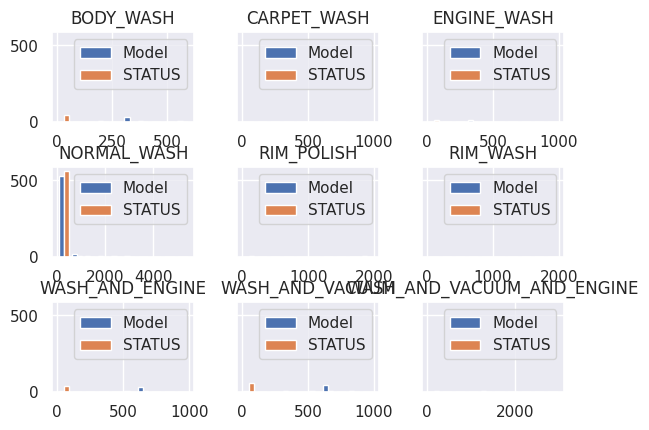

In [404]:
plt.figure(figsize=(10,10))
data.hist(by='SERVICE', bins=10, xrot=0, sharex=False, sharey=True, legend=True, grid=True)
plt.show()

<Figure size 1000x1000 with 0 Axes>

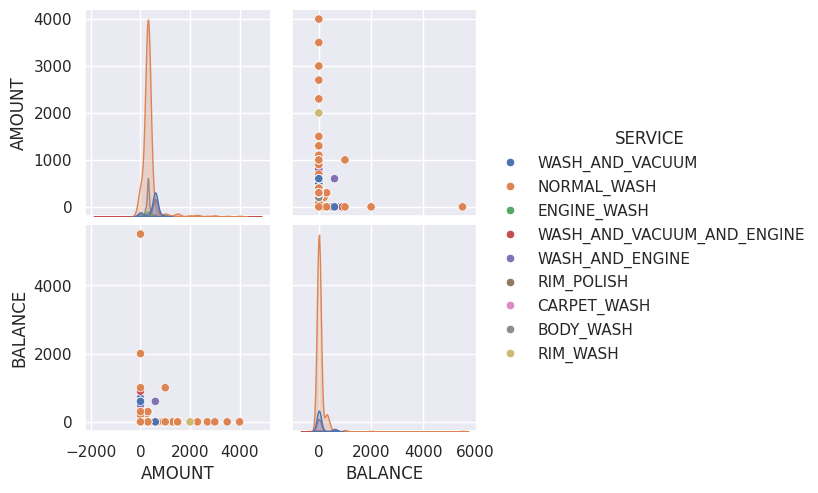

In [405]:
plt.figure(figsize=(10,10))
sb.pairplot(data, hue='SERVICE', kind='scatter')
plt.show()

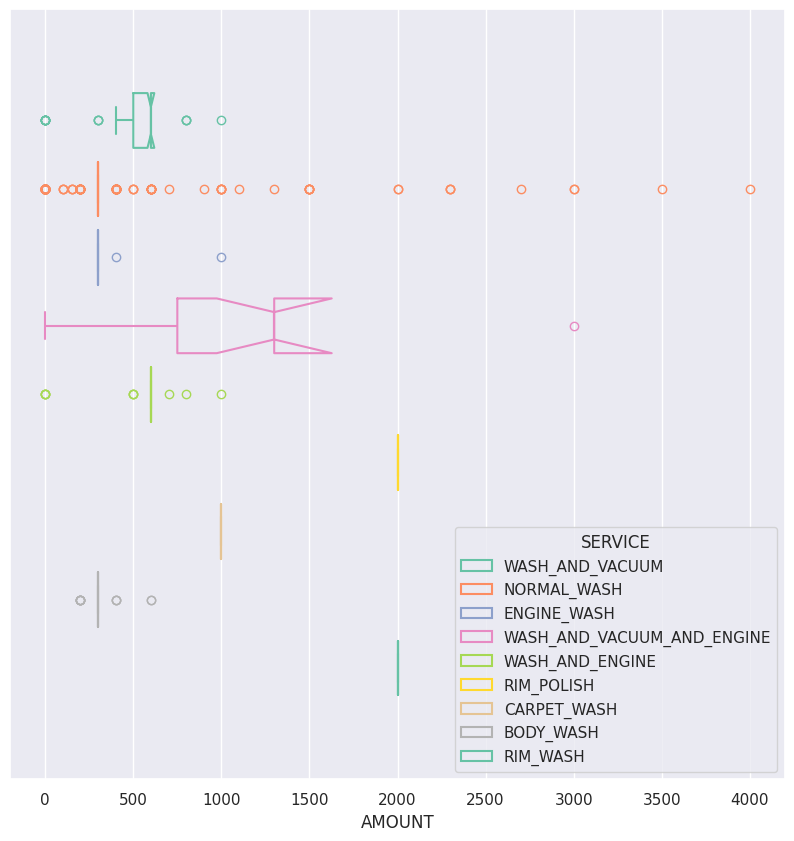

In [406]:
plt.figure(figsize=(10,10))
sb.boxplot(data=data, palette="Set2", hue='SERVICE', x="AMOUNT", fill=False, gap=0.2, notch=True)
plt.show()

<Figure size 1000x1000 with 0 Axes>

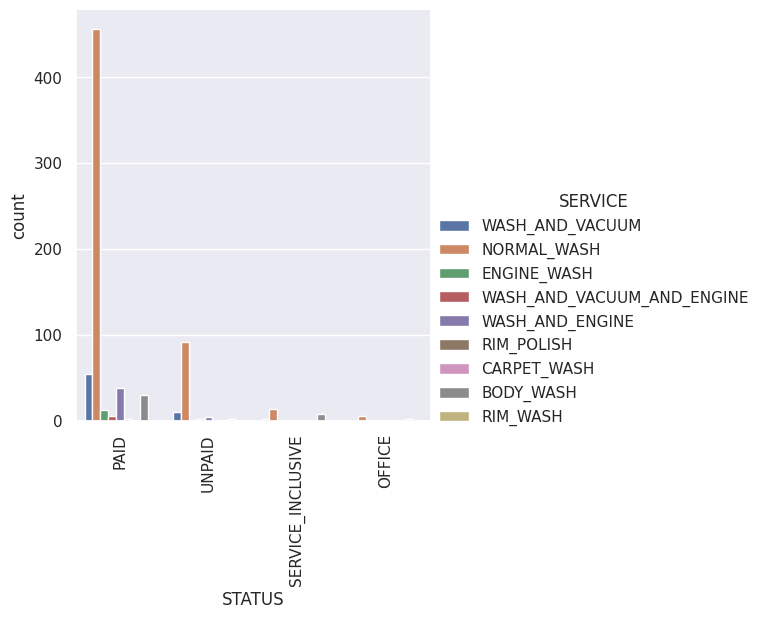

In [407]:
plt.figure(figsize=(10,10))
count_=sb.catplot(data=data, hue="SERVICE", kind='count', x='STATUS')
count_.set_xticklabels(labels=list(data['STATUS'].unique()), rotation=90)
plt.show()

<Figure size 1000x1000 with 0 Axes>

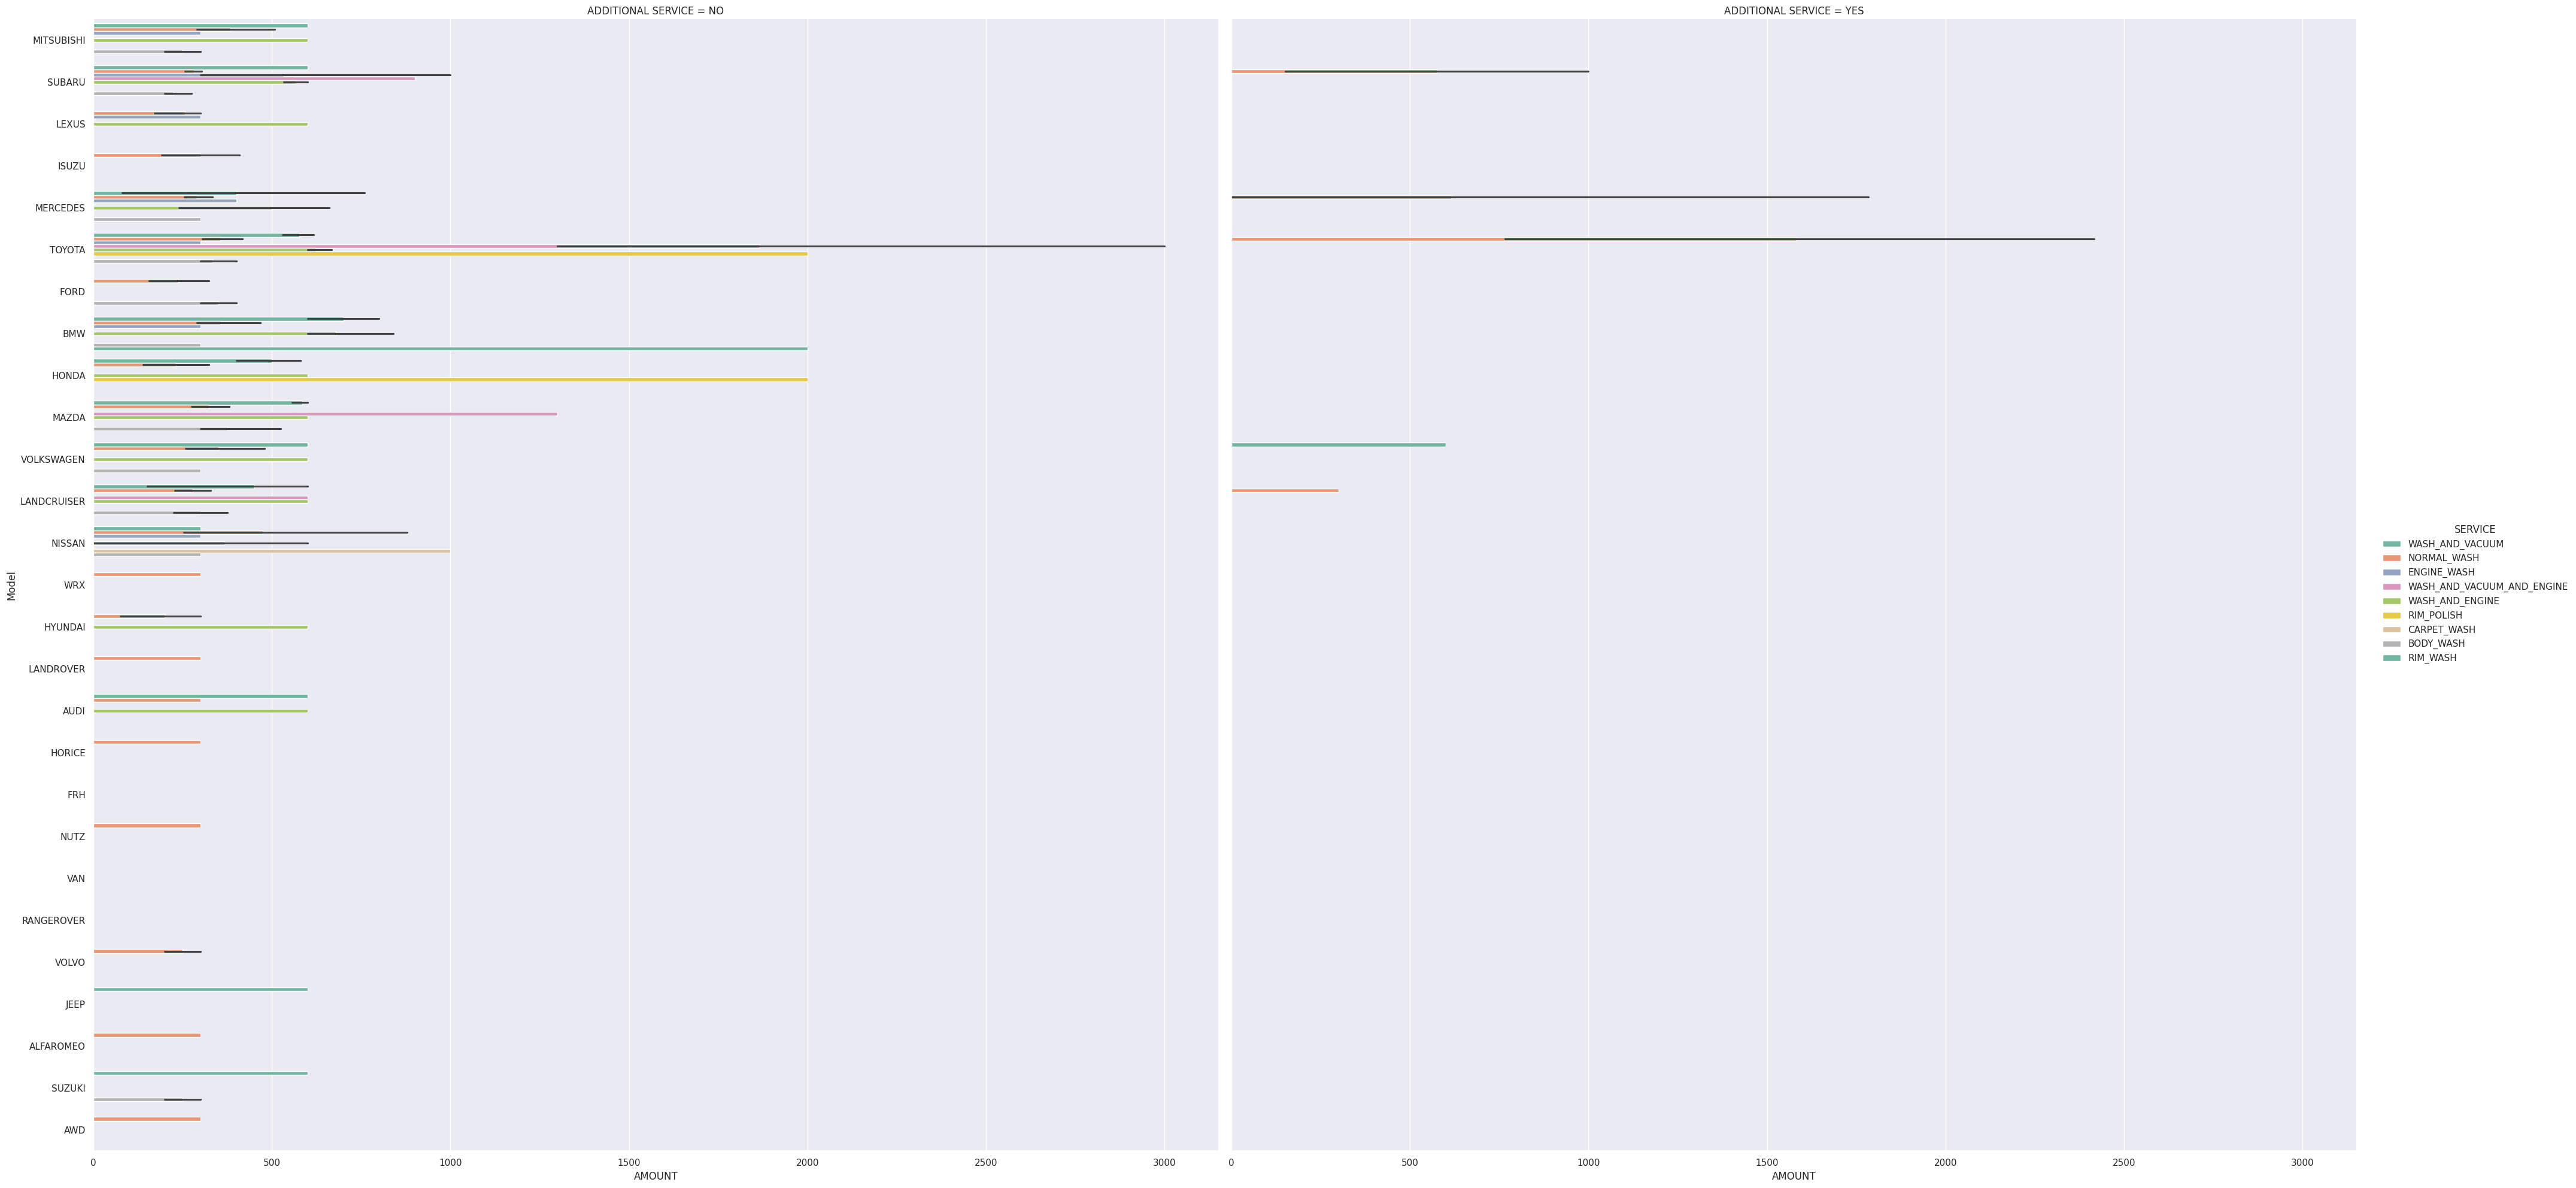

In [408]:
plt.figure(figsize=(10,10))
_count_=sb.catplot(data=data, hue="SERVICE", col='ADDITIONAL SERVICE', x='AMOUNT', kind='bar', y='Model', height=20, palette='Set2')
_count_.set_yticklabels(labels=list(data['Model'].unique()), rotation=0)
plt.show()

In [409]:
data.head().style.background_gradient(cmap='Reds')

,Model,STATUS,SERVICE,ADDITIONAL SERVICE,AMOUNT,BALANCE
0,MITSUBISHI,PAID,WASH_AND_VACUUM,NO,600.000000,0.000000
1,SUBARU,PAID,NORMAL_WASH,NO,300.000000,0.000000
2,LEXUS,PAID,NORMAL_WASH,NO,300.000000,0.000000
3,ISUZU,PAID,NORMAL_WASH,NO,300.000000,0.000000
4,MERCEDES,PAID,WASH_AND_VACUUM,NO,400.000000,0.000000


In [410]:
data.describe(include='all')

,Model,STATUS,SERVICE,ADDITIONAL SERVICE,AMOUNT,BALANCE
count,741,741,741,741,741.000000,741.000000
unique,27,4,9,2,NaN,NaN
top,TOYOTA,PAID,NORMAL_WASH,NO,NaN,NaN
freq,189,597,567,721,NaN,NaN
mean,NaN,NaN,NaN,NaN,382.658570,48.448043
std,NaN,NaN,NaN,NaN,382.761415,250.326045
min,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,300.000000,0.000000
50%,NaN,NaN,NaN,NaN,300.000000,0.000000
75%,NaN,NaN,NaN,NaN,300.000000,0.000000


In [421]:
col_train=list(x.columns)
print(col_train,'\n')
test_names=list(data['SERVICE'].unique())
print(test_names)

['Model', 'STATUS', 'ADDITIONAL SERVICE', 'AMOUNT', 'BALANCE'] 

['WASH_AND_VACUUM', 'NORMAL_WASH', 'ENGINE_WASH', 'WASH_AND_VACUUM_AND_ENGINE', 'WASH_AND_ENGINE', 'RIM_POLISH', 'CARPET_WASH', 'BODY_WASH', 'RIM_WASH']


In [427]:
from sklearn.preprocessing import * #LabelEncoder, StandardScaler, OneHotEndoder, MultiLabelBinarizer
le=LabelEncoder()
scale=StandardScaler()
one=OneHotEncoder(sparse_output=False)
multi=MultiLabelBinarizer(classes=test_names, sparse_output=False)

In [479]:
data_=data.copy()
data_

,Model,STATUS,SERVICE,ADDITIONAL SERVICE,AMOUNT,BALANCE
0,MITSUBISHI,PAID,WASH_AND_VACUUM,NO,600.0,0.0
1,SUBARU,PAID,NORMAL_WASH,NO,300.0,0.0
2,LEXUS,PAID,NORMAL_WASH,NO,300.0,0.0
3,ISUZU,PAID,NORMAL_WASH,NO,300.0,0.0
4,MERCEDES,PAID,WASH_AND_VACUUM,NO,400.0,0.0
...,...,...,...,...,...,...
736,SUBARU,PAID,NORMAL_WASH,NO,300.0,0.0
737,NISSAN,PAID,NORMAL_WASH,NO,300.0,0.0
738,MERCEDES,UNPAID,NORMAL_WASH,NO,300.0,0.0
739,ISUZU,UNPAID,NORMAL_WASH,NO,300.0,0.0


In [480]:
data_['ADDITIONAL SERVICE']=le.fit_transform(data_['ADDITIONAL SERVICE'])
data_['AMOUNT']=scale.fit_transform(data_[['AMOUNT']])
data_['BALANCE']=scale.fit_transform(data_[['BALANCE']])
data_['Model']=one.fit_transform(data_[['Model']])
data_['STATUS']=one.fit_transform(data_[['STATUS']])

In [465]:
data_

,Model,STATUS,SERVICE,ADDITIONAL SERVICE,AMOUNT,BALANCE
0,0.0,0.0,WASH_AND_VACUUM,0,0.568208,-0.19367
1,0.0,0.0,NORMAL_WASH,0,-0.216099,-0.19367
2,0.0,0.0,NORMAL_WASH,0,-0.216099,-0.19367
3,0.0,0.0,NORMAL_WASH,0,-0.216099,-0.19367
4,0.0,0.0,WASH_AND_VACUUM,0,0.045337,-0.19367
...,...,...,...,...,...,...
736,0.0,0.0,NORMAL_WASH,0,-0.216099,-0.19367
737,0.0,0.0,NORMAL_WASH,0,-0.216099,-0.19367
738,0.0,0.0,NORMAL_WASH,0,-0.216099,-0.19367
739,0.0,0.0,NORMAL_WASH,0,-0.216099,-0.19367


In [481]:
data_['SERVICE']=one.fit_transform(data_[['SERVICE']])
data_['SERVICE']

,SERVICE
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
736,0.0
737,0.0
738,0.0
739,0.0


In [482]:
x=data_.drop('SERVICE', axis=1)
x

,Model,STATUS,ADDITIONAL SERVICE,AMOUNT,BALANCE
0,0.0,0.0,0,0.568208,-0.19367
1,0.0,0.0,0,-0.216099,-0.19367
2,0.0,0.0,0,-0.216099,-0.19367
3,0.0,0.0,0,-0.216099,-0.19367
4,0.0,0.0,0,0.045337,-0.19367
...,...,...,...,...,...
736,0.0,0.0,0,-0.216099,-0.19367
737,0.0,0.0,0,-0.216099,-0.19367
738,0.0,0.0,0,-0.216099,-0.19367
739,0.0,0.0,0,-0.216099,-0.19367


In [483]:
y=data_['SERVICE']
y

,SERVICE
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
736,0.0
737,0.0
738,0.0
739,0.0


In [484]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [485]:
x_train

,Model,STATUS,ADDITIONAL SERVICE,AMOUNT,BALANCE
192,0.0,0.0,0,2.398259,-0.193670
696,0.0,0.0,0,-0.216099,-0.193670
180,0.0,0.0,0,-0.216099,-0.193670
291,0.0,0.0,1,8.149847,-0.193670
548,0.0,0.0,0,0.306773,-0.193670
...,...,...,...,...,...
140,0.0,0.0,0,-1.000407,2.204823
552,0.0,0.0,0,-0.216099,-0.193670
427,0.0,0.0,0,-0.477535,-0.193670
414,0.0,0.0,0,-0.216099,-0.193670


In [486]:
x_test

,Model,STATUS,ADDITIONAL SERVICE,AMOUNT,BALANCE
344,0.0,0.0,0,-0.216099,-0.19367
606,0.0,0.0,0,0.045337,-0.19367
70,0.0,0.0,0,0.568208,-0.19367
173,0.0,0.0,0,-0.216099,-0.19367
669,0.0,0.0,0,-0.216099,-0.19367
...,...,...,...,...,...
439,0.0,0.0,0,-0.216099,-0.19367
155,0.0,0.0,0,-0.216099,-0.19367
530,0.0,0.0,0,0.045337,-0.19367
543,0.0,0.0,0,0.045337,-0.19367


In [487]:
y_train

,SERVICE
192,0.0
696,0.0
180,0.0
291,0.0
548,0.0
...,...
140,0.0
552,1.0
427,0.0
414,0.0


In [488]:
y_test

,SERVICE
344,0.0
606,0.0
70,0.0
173,0.0
669,0.0
...,...
439,0.0
155,0.0
530,0.0
543,0.0


In [512]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier(n_estimators=100, random_state=42)

In [513]:
random.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [514]:
random_prediction=random.predict(x_test)
random_prediction

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [516]:
from sklearn.metrics import * #accuracy_score, classification_report
print('The accuracy score is {}.'.format(accuracy_score(y_test, random_prediction)))

The accuracy score is 0.9395973154362416.


In [492]:
print(classification_report(y_test, random_prediction))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       140
         1.0       0.00      0.00      0.00         9

    accuracy                           0.94       149
   macro avg       0.47      0.50      0.48       149
weighted avg       0.88      0.94      0.91       149



[[140   0]
 [  9   0]]


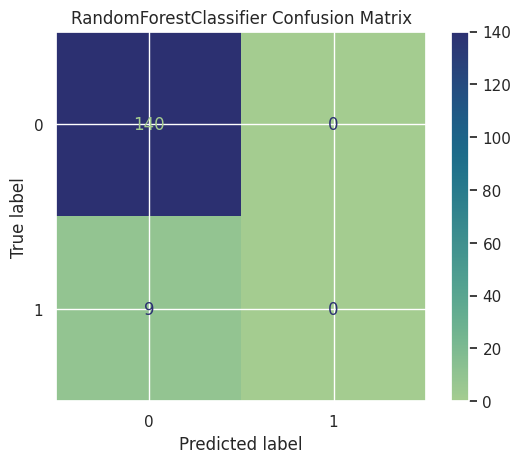

In [493]:
# Creating the confusion matrix for the RandomForestClassifier
con_mat=confusion_matrix(y_test, random_prediction)
print(con_mat)
# Creating the confusion matrix visual display
vis_con_mat=ConfusionMatrixDisplay(confusion_matrix=con_mat)
vis_con_mat.plot(cmap='crest')
plt.title('RandomForestClassifier Confusion Matrix')
# Saving the figure
#plt.savefig('RandomForestClassifier Confusion Matrix.jpg', dpi=500)
plt.show()

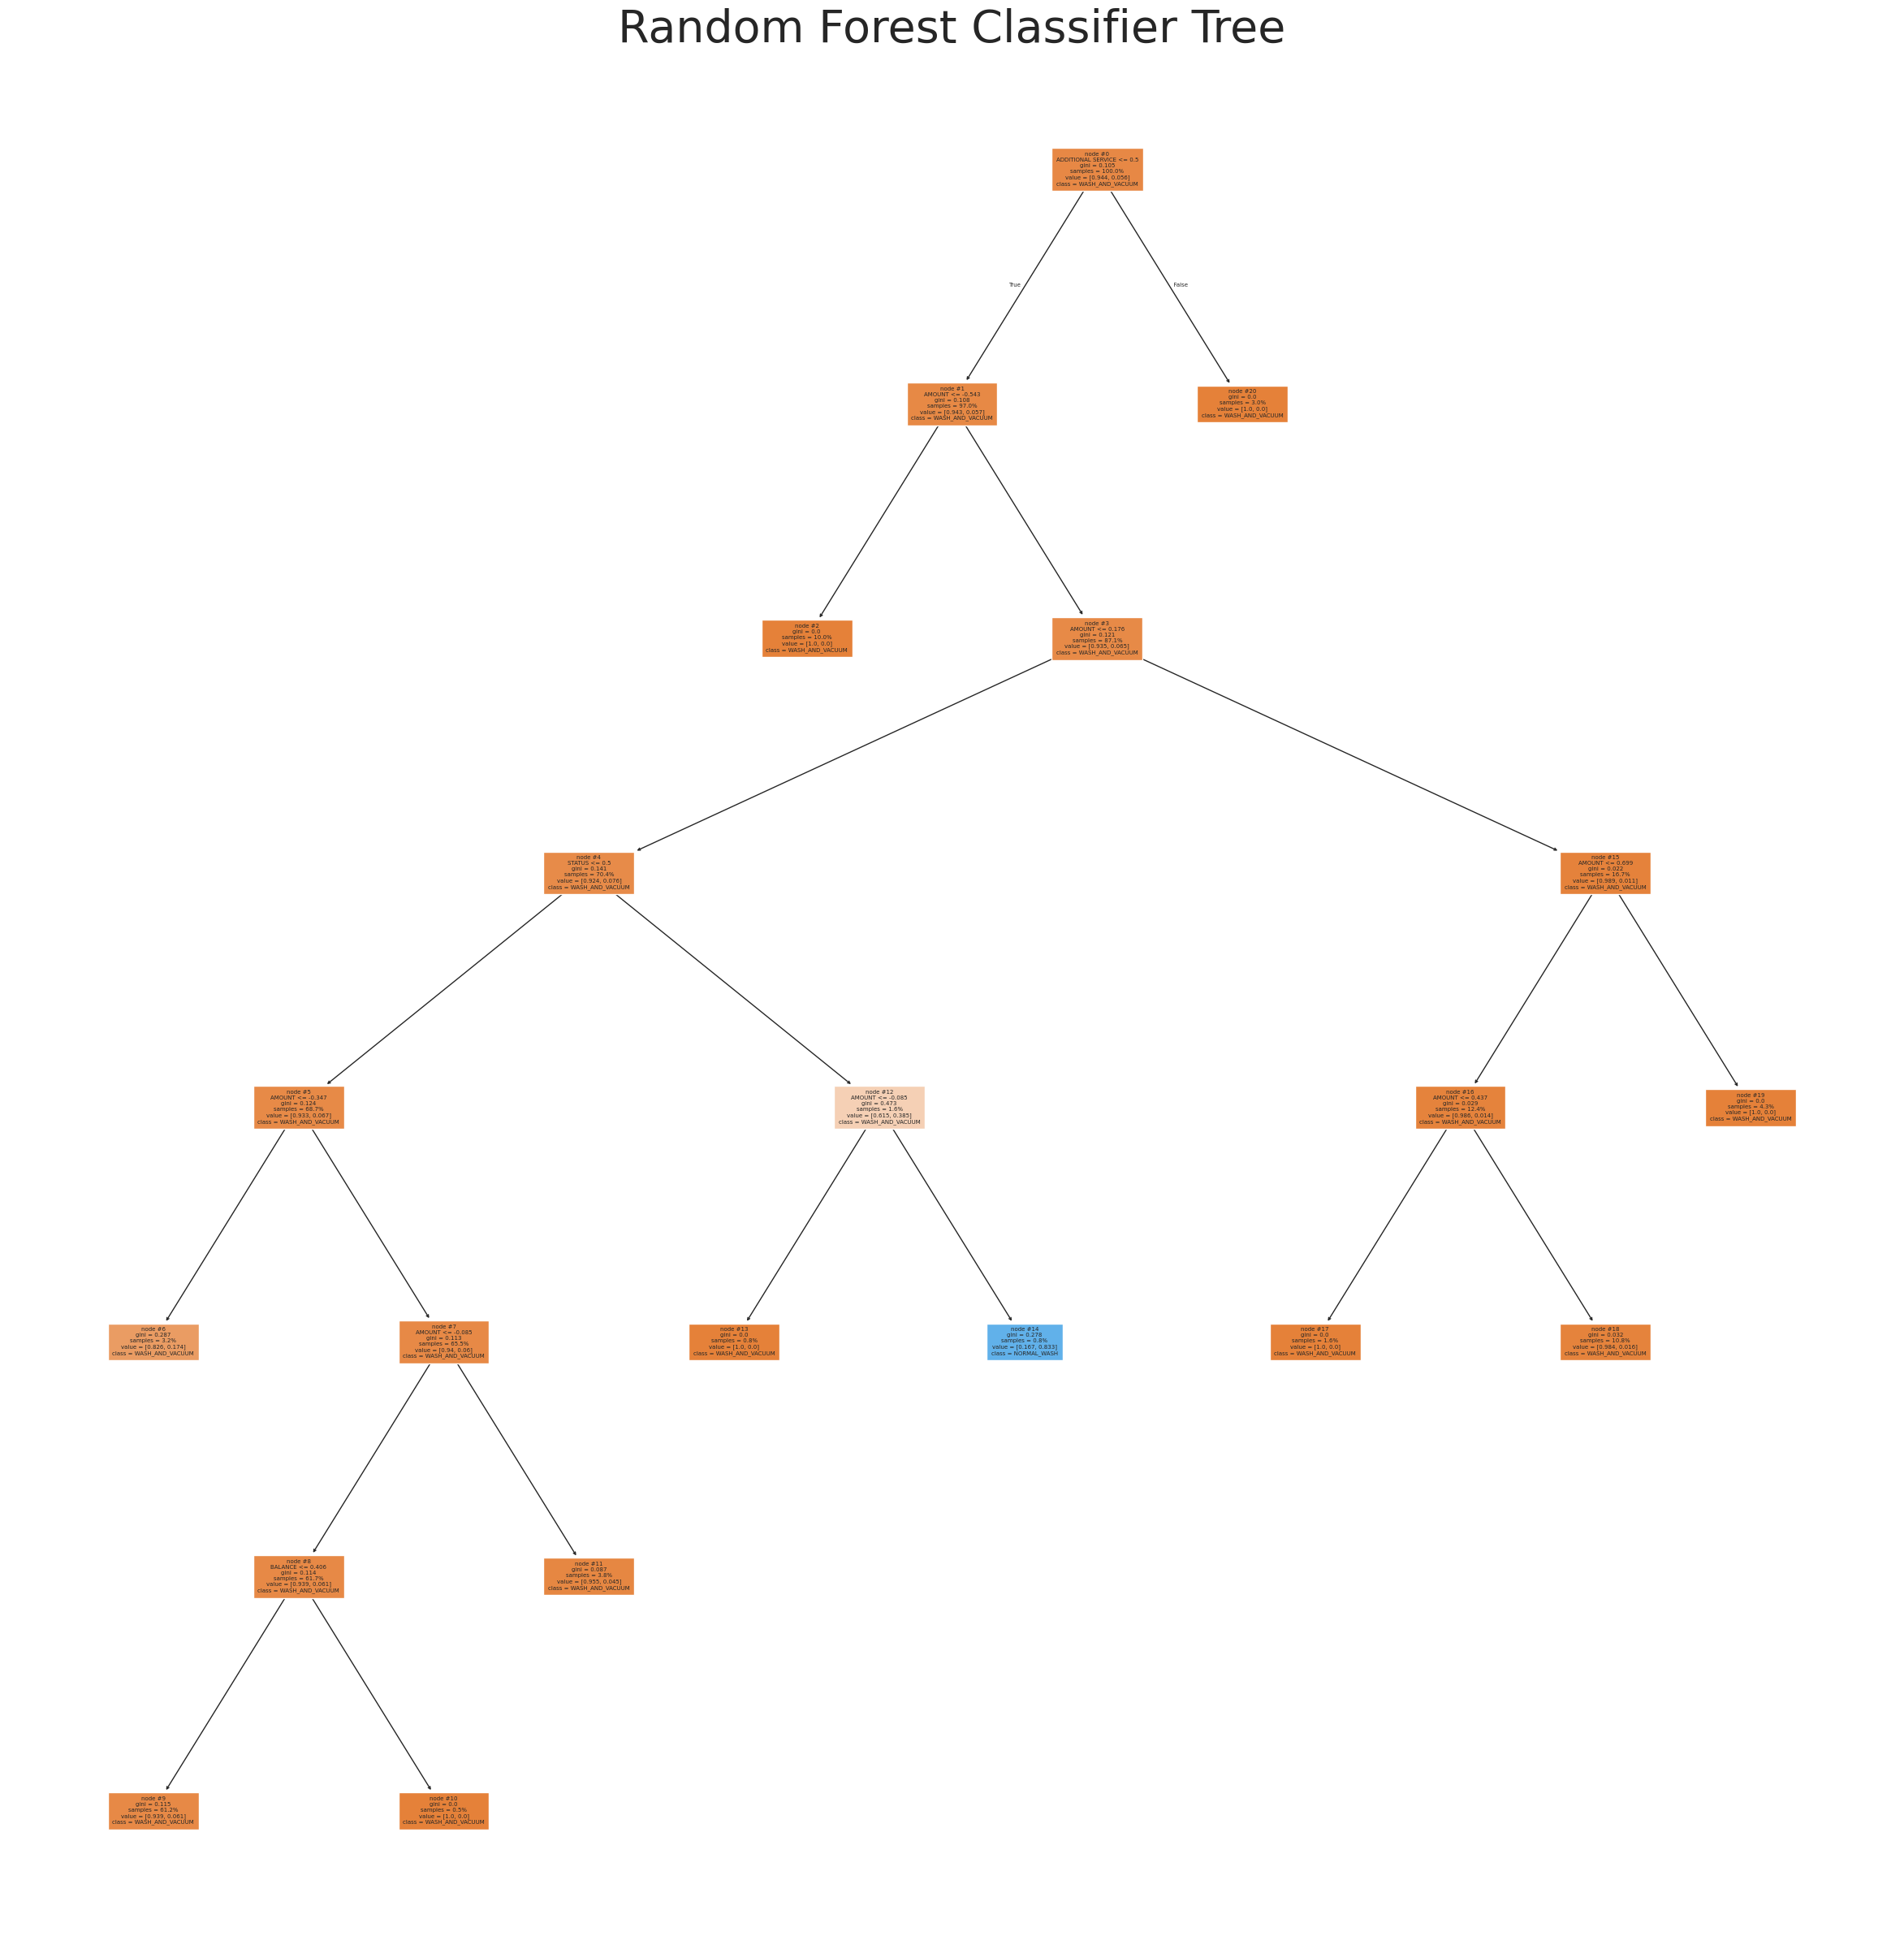

In [494]:
# Importing plot_tree
from sklearn.tree import plot_tree

# Plotting the Random Forest Classifier tree
plt.figure(figsize=(30,30))
plot_tree(random.estimators_[0], feature_names=col_train, class_names=test_names, filled=True, fontsize=5, node_ids=True, proportion=True)
plt.title('Random Forest Classifier Tree', fontsize=40)
# Saving the image
#plt.savefig('Random Forest Classifier Tree.jpg', dpi=700)
plt.show()

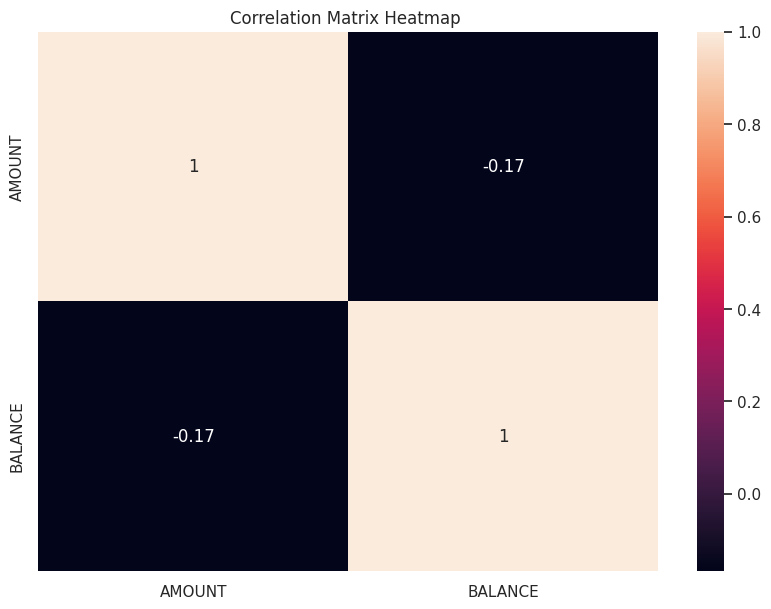

In [495]:
correlation_matrix = data.corr(numeric_only=True)
# setting the size of the plot
fig=plt.figure(figsize=(10,7))
# Plotting the correlation matrix and displaying it
sb.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix Heatmap ')
plt.savefig('heatmap.jpg', dpi=500)
plt.show()

              Feature  Gini Importance
0               Model         0.000000
2  ADDITIONAL SERVICE         0.015146
4             BALANCE         0.066317
1              STATUS         0.220572
3              AMOUNT         0.697965


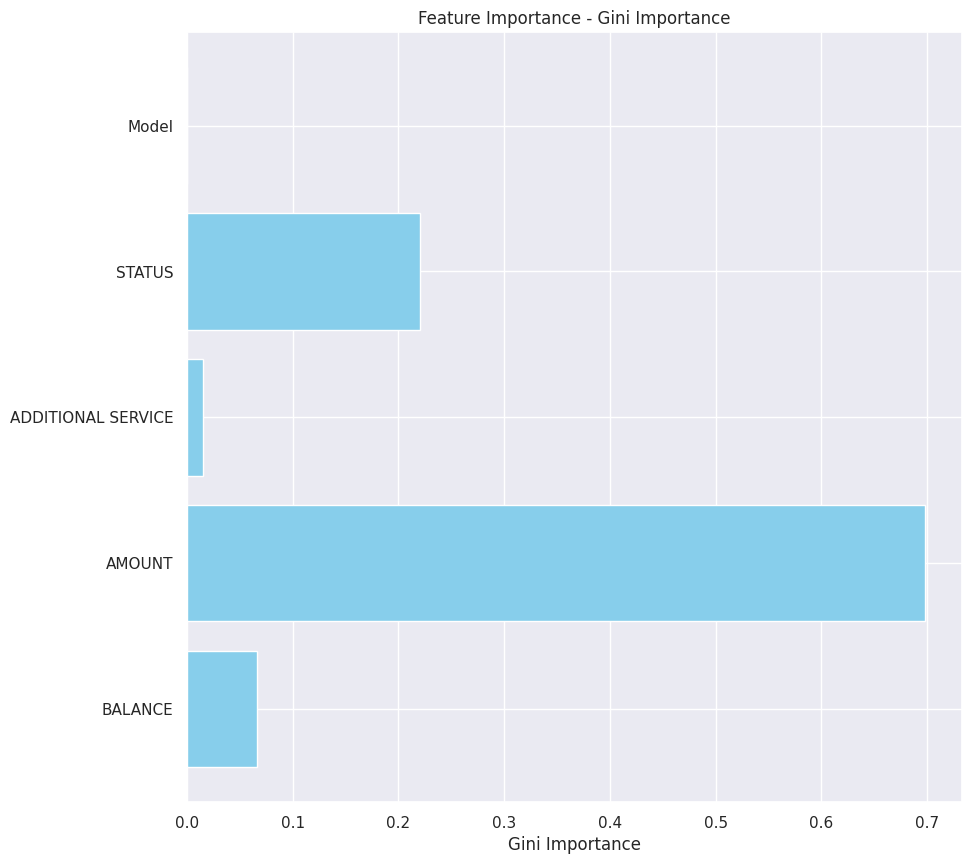

In [496]:
# Feature importance plots
Feature_imp=random.feature_importances_
feature_imp_df=pd.DataFrame({'Feature':col_train, 'Gini Importance':Feature_imp}).sort_values('Gini Importance', ascending=True)
print(feature_imp_df)

plt.figure(figsize=(10,10))
plt.barh(col_train, Feature_imp, color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance')
plt.gca().invert_yaxis()
#plt.savefig('Feature Importance.jpg', dpi=500)
plt.show()